In [1]:
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt

#### Read GCA

In [44]:
blast_out = pd.read_table("/home1/wangd/project/PXD010154/GCA_blast/PXD010154-1de73bcb-ee3e-4d19-9d8d-da72f11d5fac.psm.parquet/blast_out.tsv")

In [45]:
GCA = blast_out[blast_out["isGCA"]=="GCA"]

In [46]:
GCA.to_csv('/home1/wangd/project/PXD010154/GCA_blast/PXD010154-1de73bcb-ee3e-4d19-9d8d-da72f11d5fac.psm.parquet/isGCA.tsv',sep='\t', index=False)

In [3]:
GCA = pd.read_table('isGCA.tsv')

In [4]:
GCA

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,consensus_support,reference_file_name,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source,isGCA
0,DIGTAPFAPNLEEINNILESK,"GCA_166623,GCA_181492",[937 937],[957 957],0.000556,0,NaN,6080.6000,2,1143.094299,...,NaN,01524_A01_P015424_S00_N01_R1,41482,NaN,NaN,NaN,NaN,NaN,GCA,GCA
1,IFLVSVEEPLLVKLVSELTPLTVHK,GCA_248243,[1349],[1373],0.000556,1,NaN,5854.5000,3,935.561462,...,NaN,01524_A01_P015424_S00_N01_R1,39707,NaN,NaN,NaN,NaN,NaN,GCA,GCA
2,TVMPATLNKLLNNK,GCA_283984,[225],[238],0.063686,1,['3-UNIMOD:35' '8-UNIMOD:7'],4333.1000,3,525.282653,...,NaN,01524_A01_P015424_S00_N01_R1,24371,NaN,NaN,NaN,NaN,NaN,GCA,GCA
3,SKVPGVVSGAMSGAVLQNVPTSTVWVAGPK,"GCA_122173,GCA_242828",[272 272],[301 301],0.000556,0,['11-UNIMOD:35' '17|18-UNIMOD:7'],4128.7000,3,981.527770,...,NaN,01524_A01_P015424_S00_N01_R1,22245,NaN,NaN,NaN,NaN,NaN,GCA,GCA
4,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,NaN,01524_A01_P015424_S00_N01_R1,33949,NaN,NaN,NaN,NaN,NaN,GCA,GCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104474,AMGIMNSFINDIFER,GCA_243854,[59],[73],0.000556,1,['2|5-UNIMOD:35' '6-UNIMOD:7'],4789.1636,2,896.406311,...,NaN,01307_D05_P013386_S00_N36_R1,36358,NaN,NaN,NaN,NaN,NaN,GCA,GCA
104475,DVASLSSQIQDTQELLQEETR,GCA_293797,[1316],[1336],0.000556,1,NaN,5055.1770,2,1195.597900,...,NaN,01307_D05_P013386_S00_N36_R1,38639,NaN,NaN,NaN,NaN,NaN,GCA,GCA
104476,AMGIMNSFINDIFER,GCA_243854,[59],[73],0.000556,1,['2|5-UNIMOD:35' '6-UNIMOD:7'],5820.5356,2,896.407410,...,NaN,01307_D05_P013386_S00_N36_R1,45019,NaN,NaN,NaN,NaN,NaN,GCA,GCA
104477,LGELTMTDATPDSLSLSWMVPEGQFDHFLVQYR,GCA_285753,[2878],[2910],0.000556,1,['19-UNIMOD:35'],5644.5786,3,1267.610718,...,NaN,01307_D05_P013386_S00_N36_R1,43573,NaN,NaN,NaN,NaN,NaN,GCA,GCA


#### PeptideAtlas

In [5]:
column_names = ['PeptideAccession', 'observations', 'best score', 'peptide sequence','']
PeptideAtlas = pd.read_table("PeptideAtlasInput_concat.PAidentlist.peptideSummary",header=None,names=column_names)

In [6]:
PeptideAtlas_dict = dict(zip(PeptideAtlas['peptide sequence'], PeptideAtlas['observations']))

In [7]:
PeptideAtlas_dict

{'PMKDETFGEYR': 14,
 'GLGTDEDTLIEILAS': 188,
 'MLFCSCQDQACAER': 260,
 'ALQQRLQGAEE': 3,
 'ALDWLALIYWDDDKR': 20,
 'SAGRQMIDNSYQVEKLAKDLDF': 1,
 'QASASYDSEEEEEGLPMS': 19,
 'SDVEDHSVHLLFSAN': 10,
 'NDDDKDDEIVFKQPISC': 3,
 'TLNHKLQDASAEVERLRRE': 1,
 'FSCGNGECIPR': 2,
 'QAELLLPGAEFHHYVGGPTETHVVR': 1384,
 'ATSAPAPGAPGGPQLA': 1,
 'TLRILFRPVASQLPRIFTSIGEDYDER': 1,
 'HLMHLELDISDSKIR': 43,
 'NELLGAGIEK': 45,
 'EETKFAQVVLQDLDKK': 3,
 'NAASSEEAKAEETGGGK': 132,
 'THVGMSIQTF': 7,
 'IYDPVCGTDGNTYPNECVLCFEN': 505,
 'SHMLTPFVEENLVSAAGGSISHQVSFSYFNAFNSLLNNMELVR': 43,
 'SDLNEVK': 20,
 'MKPAVDEMFPEGAGPYVDLDEAGGSTGL': 6,
 'VATQLPESTSLR': 75,
 'LTYLPYSMLNLK': 38,
 'DNISFPKQGS': 38,
 'ERTALFEEISRSGELAQEY': 2,
 'VDAVHLLKDHVGR': 124,
 'VKEVLFQHSGFQQS': 4,
 'AQLSDGNVGSGATG': 1,
 'SEAESLKGKLEEER': 3,
 'SVEEVASEIQPFLRG': 1,
 'DGCYCDSLENLADGYK': 24,
 'GYLSEGLVTK': 86,
 'RFEKPLEEKGEGGEFSV': 4,
 'SATSVSSAGEQAAGDPEGR': 3,
 'PQELVTAEVAAPSTSSSATSSPEGPSPARPPR': 8,
 'FPDLGQEVAL': 6,
 'DIAEFLIGQGAHVGAVNSEGDTPL': 16,
 'PFA

In [8]:
def getPeptideAtlasObservations(seq):
    if PeptideAtlas_dict.get(seq):
        return PeptideAtlas_dict.get(seq)
    else:
        return 0

In [9]:
GCA['PeptideAtlas_observations'] = GCA['sequence'].apply(getPeptideAtlasObservations)

In [10]:
GCA

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,reference_file_name,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source,isGCA,PeptideAtlas_observations
0,DIGTAPFAPNLEEINNILESK,"GCA_166623,GCA_181492",[937 937],[957 957],0.000556,0,NaN,6080.6000,2,1143.094299,...,01524_A01_P015424_S00_N01_R1,41482,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0
1,IFLVSVEEPLLVKLVSELTPLTVHK,GCA_248243,[1349],[1373],0.000556,1,NaN,5854.5000,3,935.561462,...,01524_A01_P015424_S00_N01_R1,39707,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0
2,TVMPATLNKLLNNK,GCA_283984,[225],[238],0.063686,1,['3-UNIMOD:35' '8-UNIMOD:7'],4333.1000,3,525.282653,...,01524_A01_P015424_S00_N01_R1,24371,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0
3,SKVPGVVSGAMSGAVLQNVPTSTVWVAGPK,"GCA_122173,GCA_242828",[272 272],[301 301],0.000556,0,['11-UNIMOD:35' '17|18-UNIMOD:7'],4128.7000,3,981.527770,...,01524_A01_P015424_S00_N01_R1,22245,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0
4,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,01524_A01_P015424_S00_N01_R1,33949,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104474,AMGIMNSFINDIFER,GCA_243854,[59],[73],0.000556,1,['2|5-UNIMOD:35' '6-UNIMOD:7'],4789.1636,2,896.406311,...,01307_D05_P013386_S00_N36_R1,36358,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0
104475,DVASLSSQIQDTQELLQEETR,GCA_293797,[1316],[1336],0.000556,1,NaN,5055.1770,2,1195.597900,...,01307_D05_P013386_S00_N36_R1,38639,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0
104476,AMGIMNSFINDIFER,GCA_243854,[59],[73],0.000556,1,['2|5-UNIMOD:35' '6-UNIMOD:7'],5820.5356,2,896.407410,...,01307_D05_P013386_S00_N36_R1,45019,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0
104477,LGELTMTDATPDSLSLSWMVPEGQFDHFLVQYR,GCA_285753,[2878],[2910],0.000556,1,['19-UNIMOD:35'],5644.5786,3,1267.610718,...,01307_D05_P013386_S00_N36_R1,43573,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0


#### GPMDB

In [27]:
len(set(GCA['sequence']))

15684

In [42]:
session = requests.Session()
def getApiRes(seq):
    url = 'https://rest.thegpm.org/1/peptide/count/seq='+seq
    response = session.get(url)
    if response.status_code == 200:
        if len(response.json()) == 1:
            return response.json()[0]
        else:
            return response.json()
    else:
        return "error"

In [29]:
getApiRes("SKVPGVVSGAMSGAVLQNVPTSTVWVAGPK")

0

In [30]:
gpmdb_dict = {}
for i in tqdm(set(GCA['sequence'])):
    gpmdb_dict[i] = getApiRes(i)

 95%|█████████▍| 14840/15684 [2:27:17<08:22,  1.68it/s]  


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [34]:
len(gpmdb_dict)

14840

In [41]:
len(set(GCA['sequence']) - set(gpmdb_dict.keys()))

844

In [43]:
for i in tqdm(set(GCA['sequence']) - set(gpmdb_dict.keys())):
    gpmdb_dict[i] = getApiRes(i)

100%|██████████| 844/844 [08:56<00:00,  1.57it/s]


In [44]:
len(gpmdb_dict)

15684

In [46]:
GCA['GPMDB_observations'] = GCA['sequence'].apply(gpmdb_dict.get)

In [47]:
GCA

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source,isGCA,PeptideAtlas_observations,GPMDB_observations
0,DIGTAPFAPNLEEINNILESK,"GCA_166623,GCA_181492",[937 937],[957 957],0.000556,0,NaN,6080.6000,2,1143.094299,...,41482,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
1,IFLVSVEEPLLVKLVSELTPLTVHK,GCA_248243,[1349],[1373],0.000556,1,NaN,5854.5000,3,935.561462,...,39707,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
2,TVMPATLNKLLNNK,GCA_283984,[225],[238],0.063686,1,['3-UNIMOD:35' '8-UNIMOD:7'],4333.1000,3,525.282653,...,24371,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
3,SKVPGVVSGAMSGAVLQNVPTSTVWVAGPK,"GCA_122173,GCA_242828",[272 272],[301 301],0.000556,0,['11-UNIMOD:35' '17|18-UNIMOD:7'],4128.7000,3,981.527770,...,22245,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
4,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,33949,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104474,AMGIMNSFINDIFER,GCA_243854,[59],[73],0.000556,1,['2|5-UNIMOD:35' '6-UNIMOD:7'],4789.1636,2,896.406311,...,36358,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,119
104475,DVASLSSQIQDTQELLQEETR,GCA_293797,[1316],[1336],0.000556,1,NaN,5055.1770,2,1195.597900,...,38639,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
104476,AMGIMNSFINDIFER,GCA_243854,[59],[73],0.000556,1,['2|5-UNIMOD:35' '6-UNIMOD:7'],5820.5356,2,896.407410,...,45019,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,119
104477,LGELTMTDATPDSLSLSWMVPEGQFDHFLVQYR,GCA_285753,[2878],[2910],0.000556,1,['19-UNIMOD:35'],5644.5786,3,1267.610718,...,43573,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0


In [48]:
GCA.to_csv('GCA_observations.tsv',sep='\t', index=False)

In [55]:
GCA[(GCA['PeptideAtlas_observations']<10) & (GCA['GPMDB_observations']<10)]

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source,isGCA,PeptideAtlas_observations,GPMDB_observations
0,DIGTAPFAPNLEEINNILESK,"GCA_166623,GCA_181492",[937 937],[957 957],0.000556,0,NaN,6080.6000,2,1143.094299,...,41482,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
1,IFLVSVEEPLLVKLVSELTPLTVHK,GCA_248243,[1349],[1373],0.000556,1,NaN,5854.5000,3,935.561462,...,39707,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
2,TVMPATLNKLLNNK,GCA_283984,[225],[238],0.063686,1,['3-UNIMOD:35' '8-UNIMOD:7'],4333.1000,3,525.282653,...,24371,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
3,SKVPGVVSGAMSGAVLQNVPTSTVWVAGPK,"GCA_122173,GCA_242828",[272 272],[301 301],0.000556,0,['11-UNIMOD:35' '17|18-UNIMOD:7'],4128.7000,3,981.527770,...,22245,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
4,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,33949,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104470,TPEVTCVVVDVSHQDPEVQFK,GCA_263327,[186],[206],0.000556,1,['6-UNIMOD:4' '14-UNIMOD:7'],4145.0625,3,805.726135,...,30903,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
104471,VAPDEHPILLTKAPLNPK,GCA_190681,[97],[114],0.000556,1,NaN,3281.1985,3,651.714417,...,23713,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
104472,VVSVLTILHQDWLNGK,GCA_268986,[182],[197],0.000556,1,['10-UNIMOD:7'],4149.8230,3,608.332336,...,30938,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
104475,DVASLSSQIQDTQELLQEETR,GCA_293797,[1316],[1336],0.000556,1,NaN,5055.1770,2,1195.597900,...,38639,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0


In [56]:
GCA[(GCA['PeptideAtlas_observations']<10) & (GCA['GPMDB_observations']<10)].to_csv('GCA_observations_less10.tsv',sep='\t', index=False)

#### plot

In [2]:
GCA = pd.read_table('GCA_observations.tsv',sep='\t')

In [3]:
GCA

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source,isGCA,PeptideAtlas_observations,GPMDB_observations
0,DIGTAPFAPNLEEINNILESK,"GCA_166623,GCA_181492",[937 937],[957 957],0.000556,0,NaN,6080.6000,2,1143.094299,...,41482,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
1,IFLVSVEEPLLVKLVSELTPLTVHK,GCA_248243,[1349],[1373],0.000556,1,NaN,5854.5000,3,935.561462,...,39707,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
2,TVMPATLNKLLNNK,GCA_283984,[225],[238],0.063686,1,['3-UNIMOD:35' '8-UNIMOD:7'],4333.1000,3,525.282653,...,24371,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
3,SKVPGVVSGAMSGAVLQNVPTSTVWVAGPK,"GCA_122173,GCA_242828",[272 272],[301 301],0.000556,0,['11-UNIMOD:35' '17|18-UNIMOD:7'],4128.7000,3,981.527770,...,22245,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
4,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,33949,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104474,AMGIMNSFINDIFER,GCA_243854,[59],[73],0.000556,1,['2|5-UNIMOD:35' '6-UNIMOD:7'],4789.1636,2,896.406311,...,36358,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,119
104475,DVASLSSQIQDTQELLQEETR,GCA_293797,[1316],[1336],0.000556,1,NaN,5055.1770,2,1195.597900,...,38639,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
104476,AMGIMNSFINDIFER,GCA_243854,[59],[73],0.000556,1,['2|5-UNIMOD:35' '6-UNIMOD:7'],5820.5356,2,896.407410,...,45019,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,119
104477,LGELTMTDATPDSLSLSWMVPEGQFDHFLVQYR,GCA_285753,[2878],[2910],0.000556,1,['19-UNIMOD:35'],5644.5786,3,1267.610718,...,43573,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0


In [4]:
GCA['PeptideAtlas_observations'].max()

12325

In [5]:
GCA['GPMDB_observations'].max()

498001

#### PeptideAtlas_observations

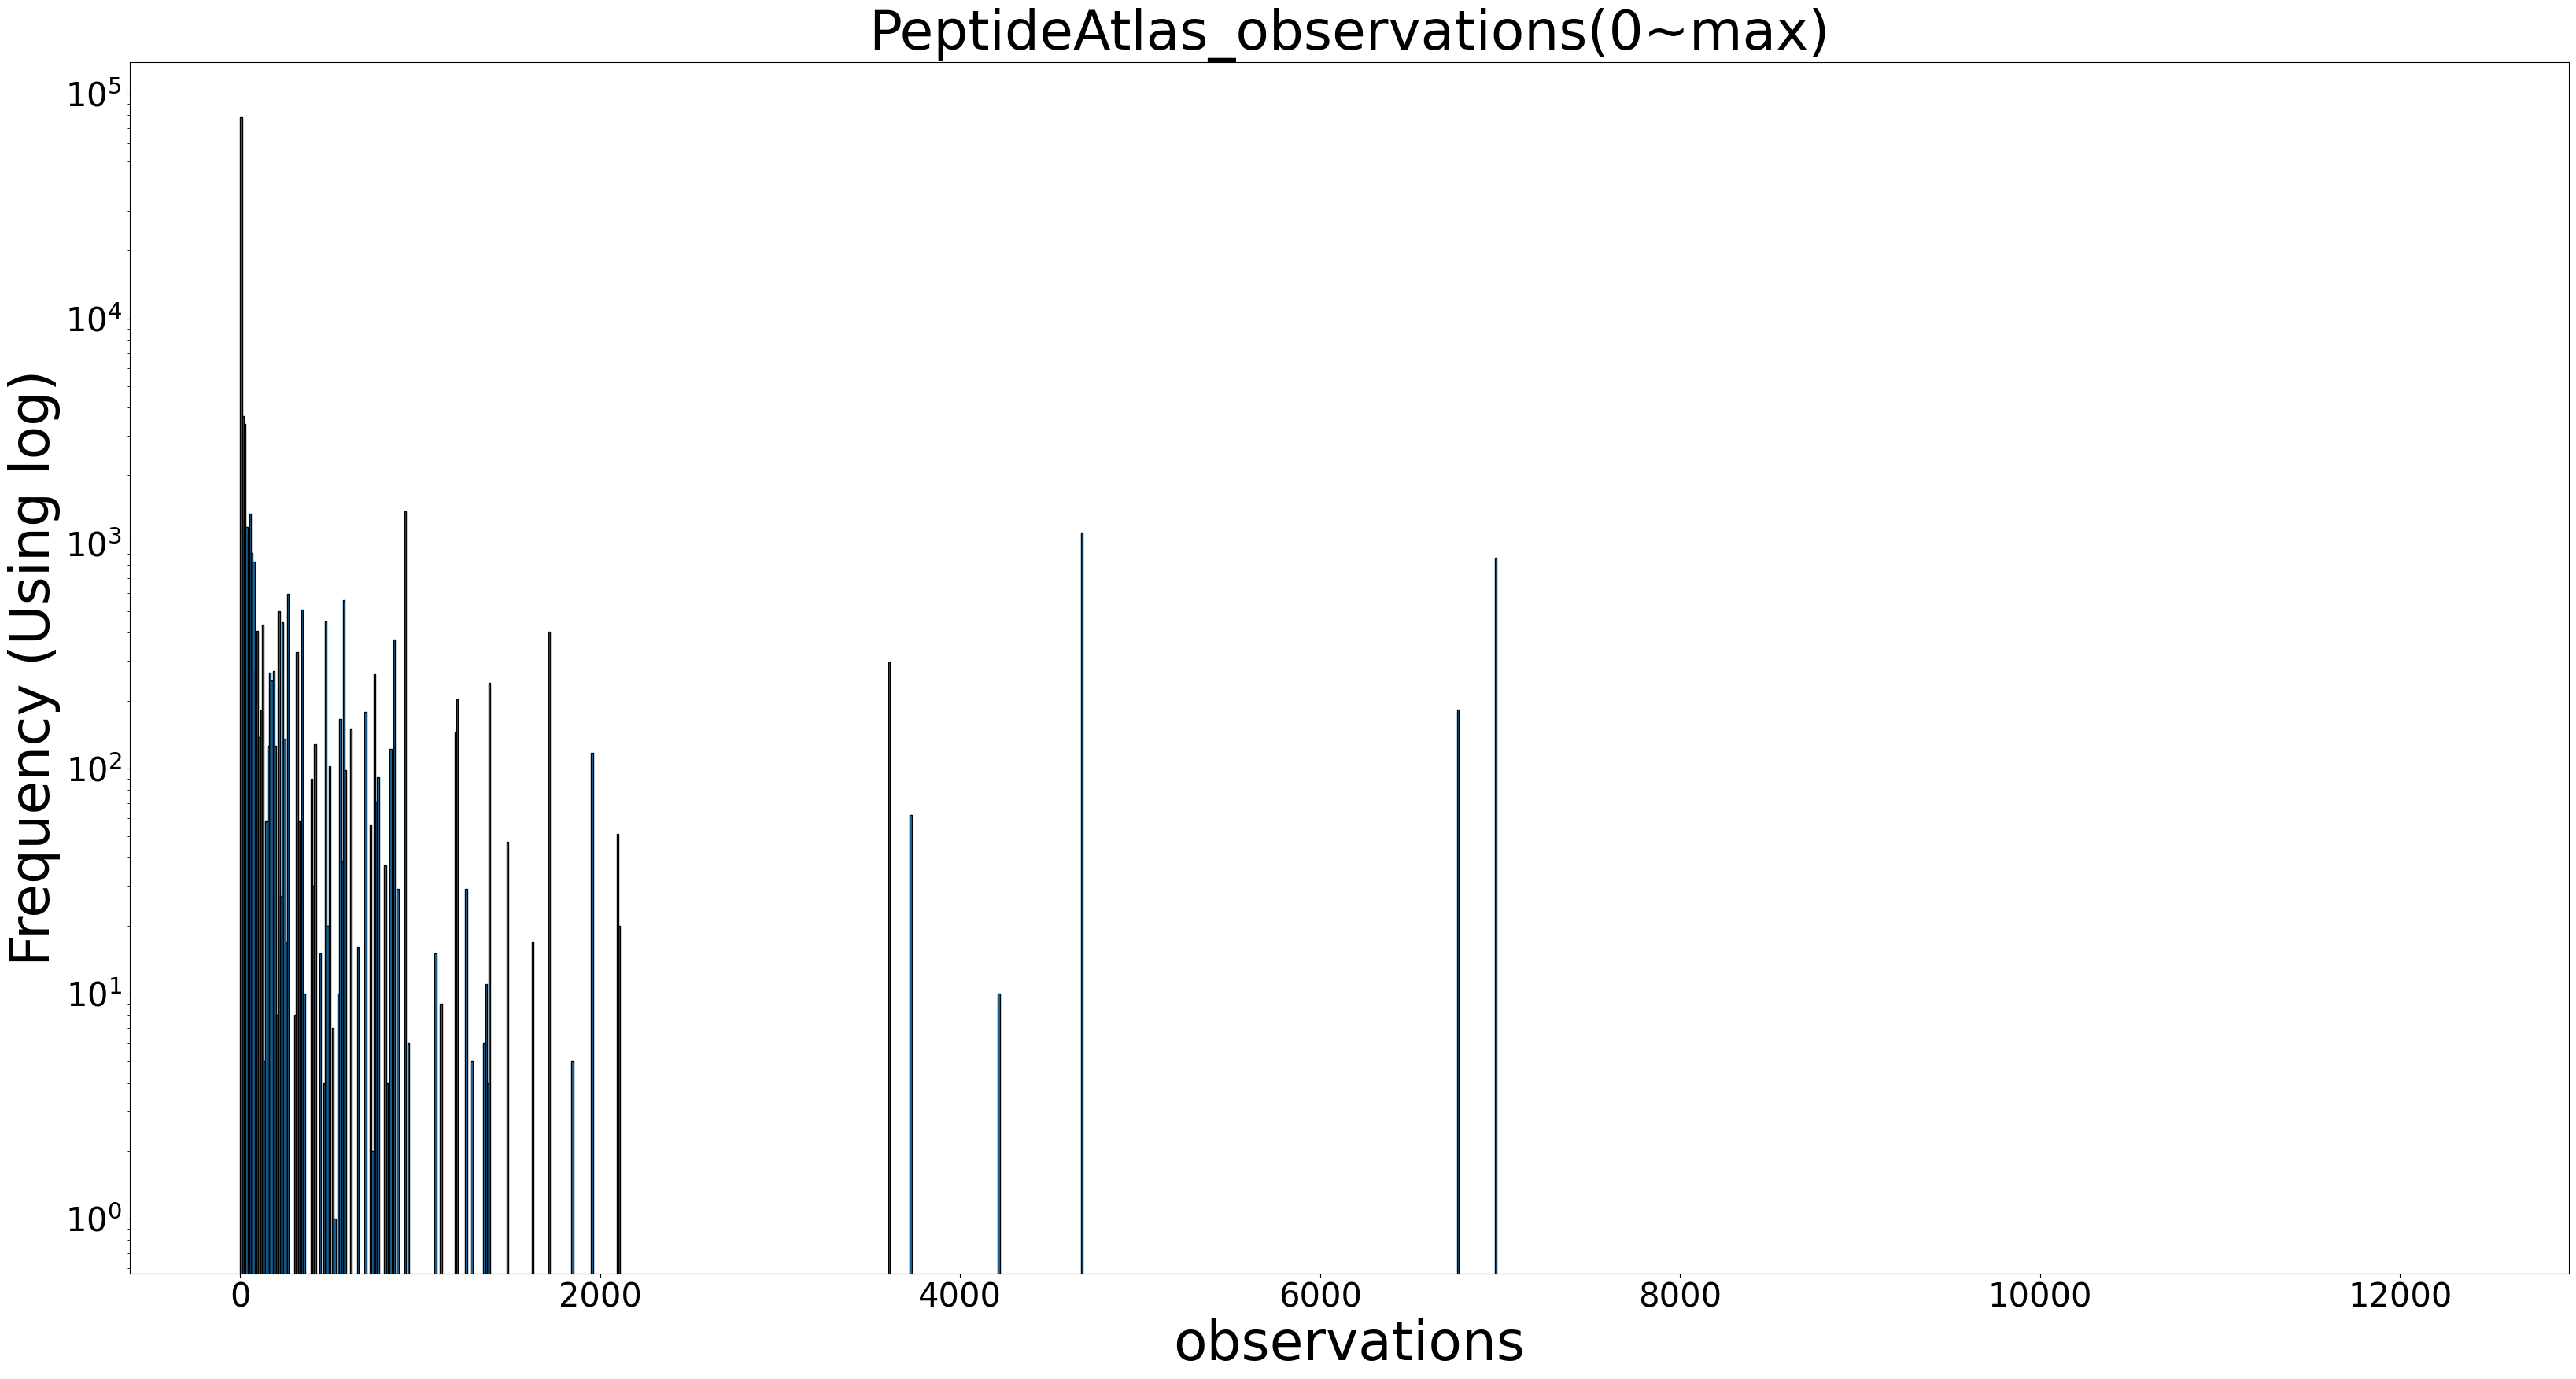

In [19]:
bins = range(0, 12325, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(0~max)', fontsize=50)
plt.show()

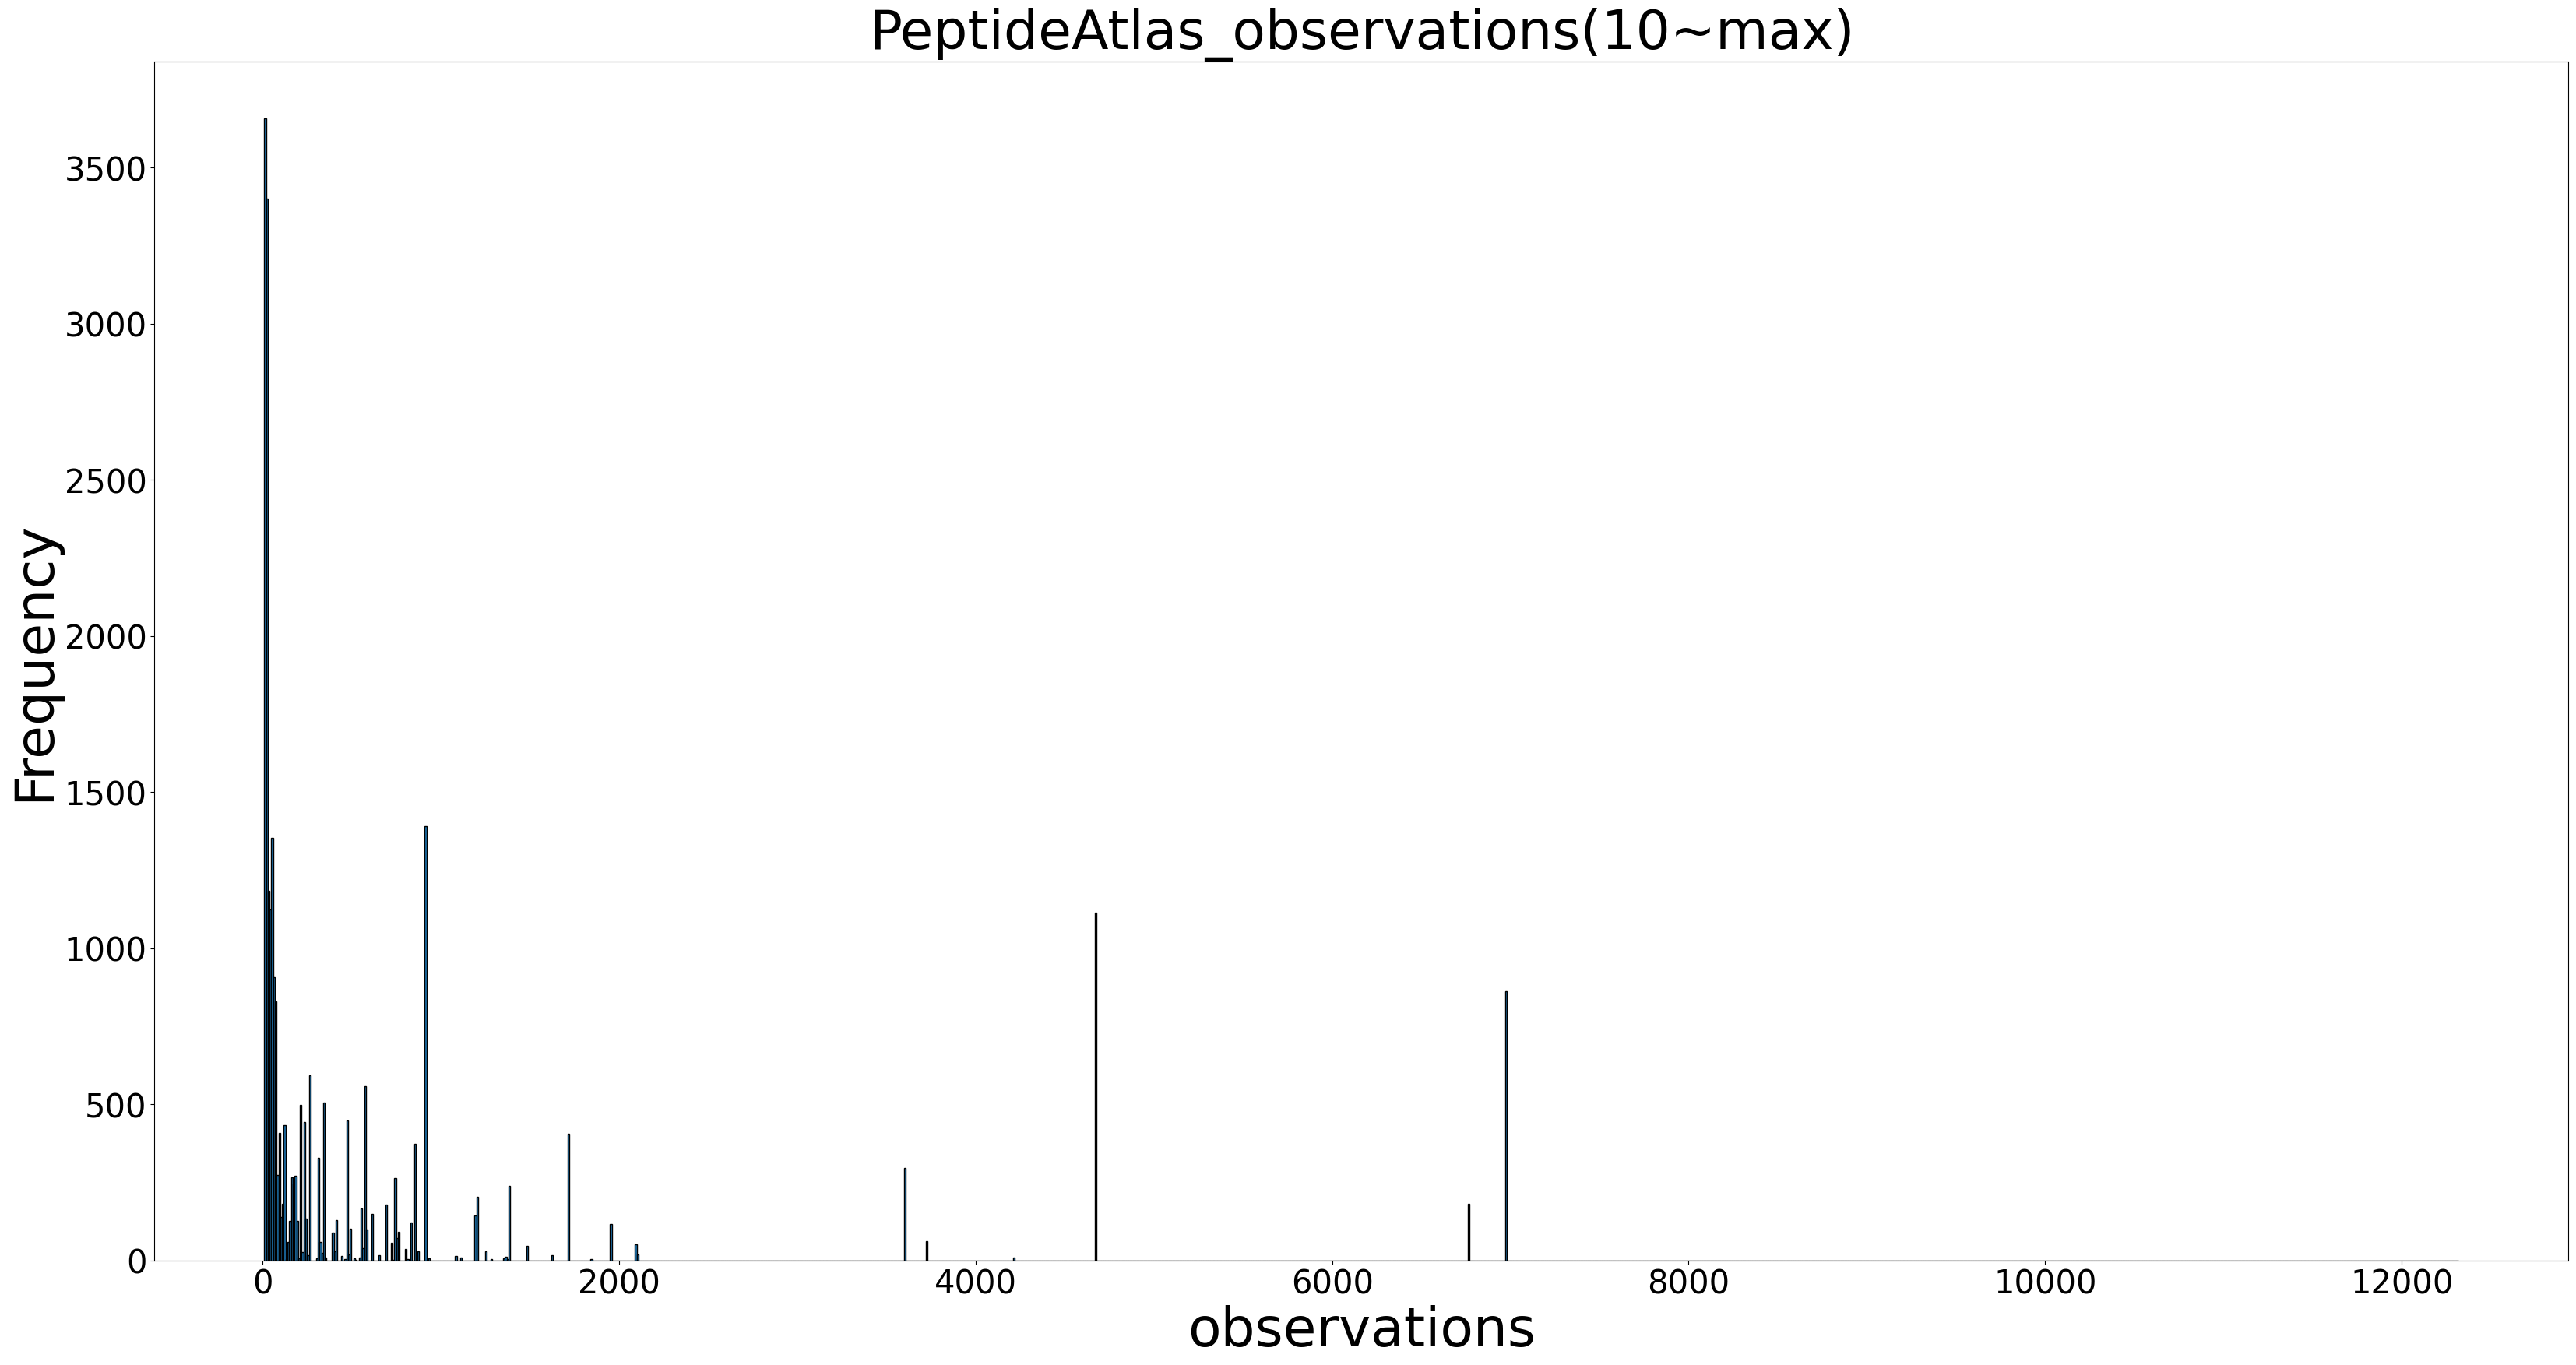

In [47]:
bins = range(10, 12325, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(10~max)', fontsize=50)
plt.show()

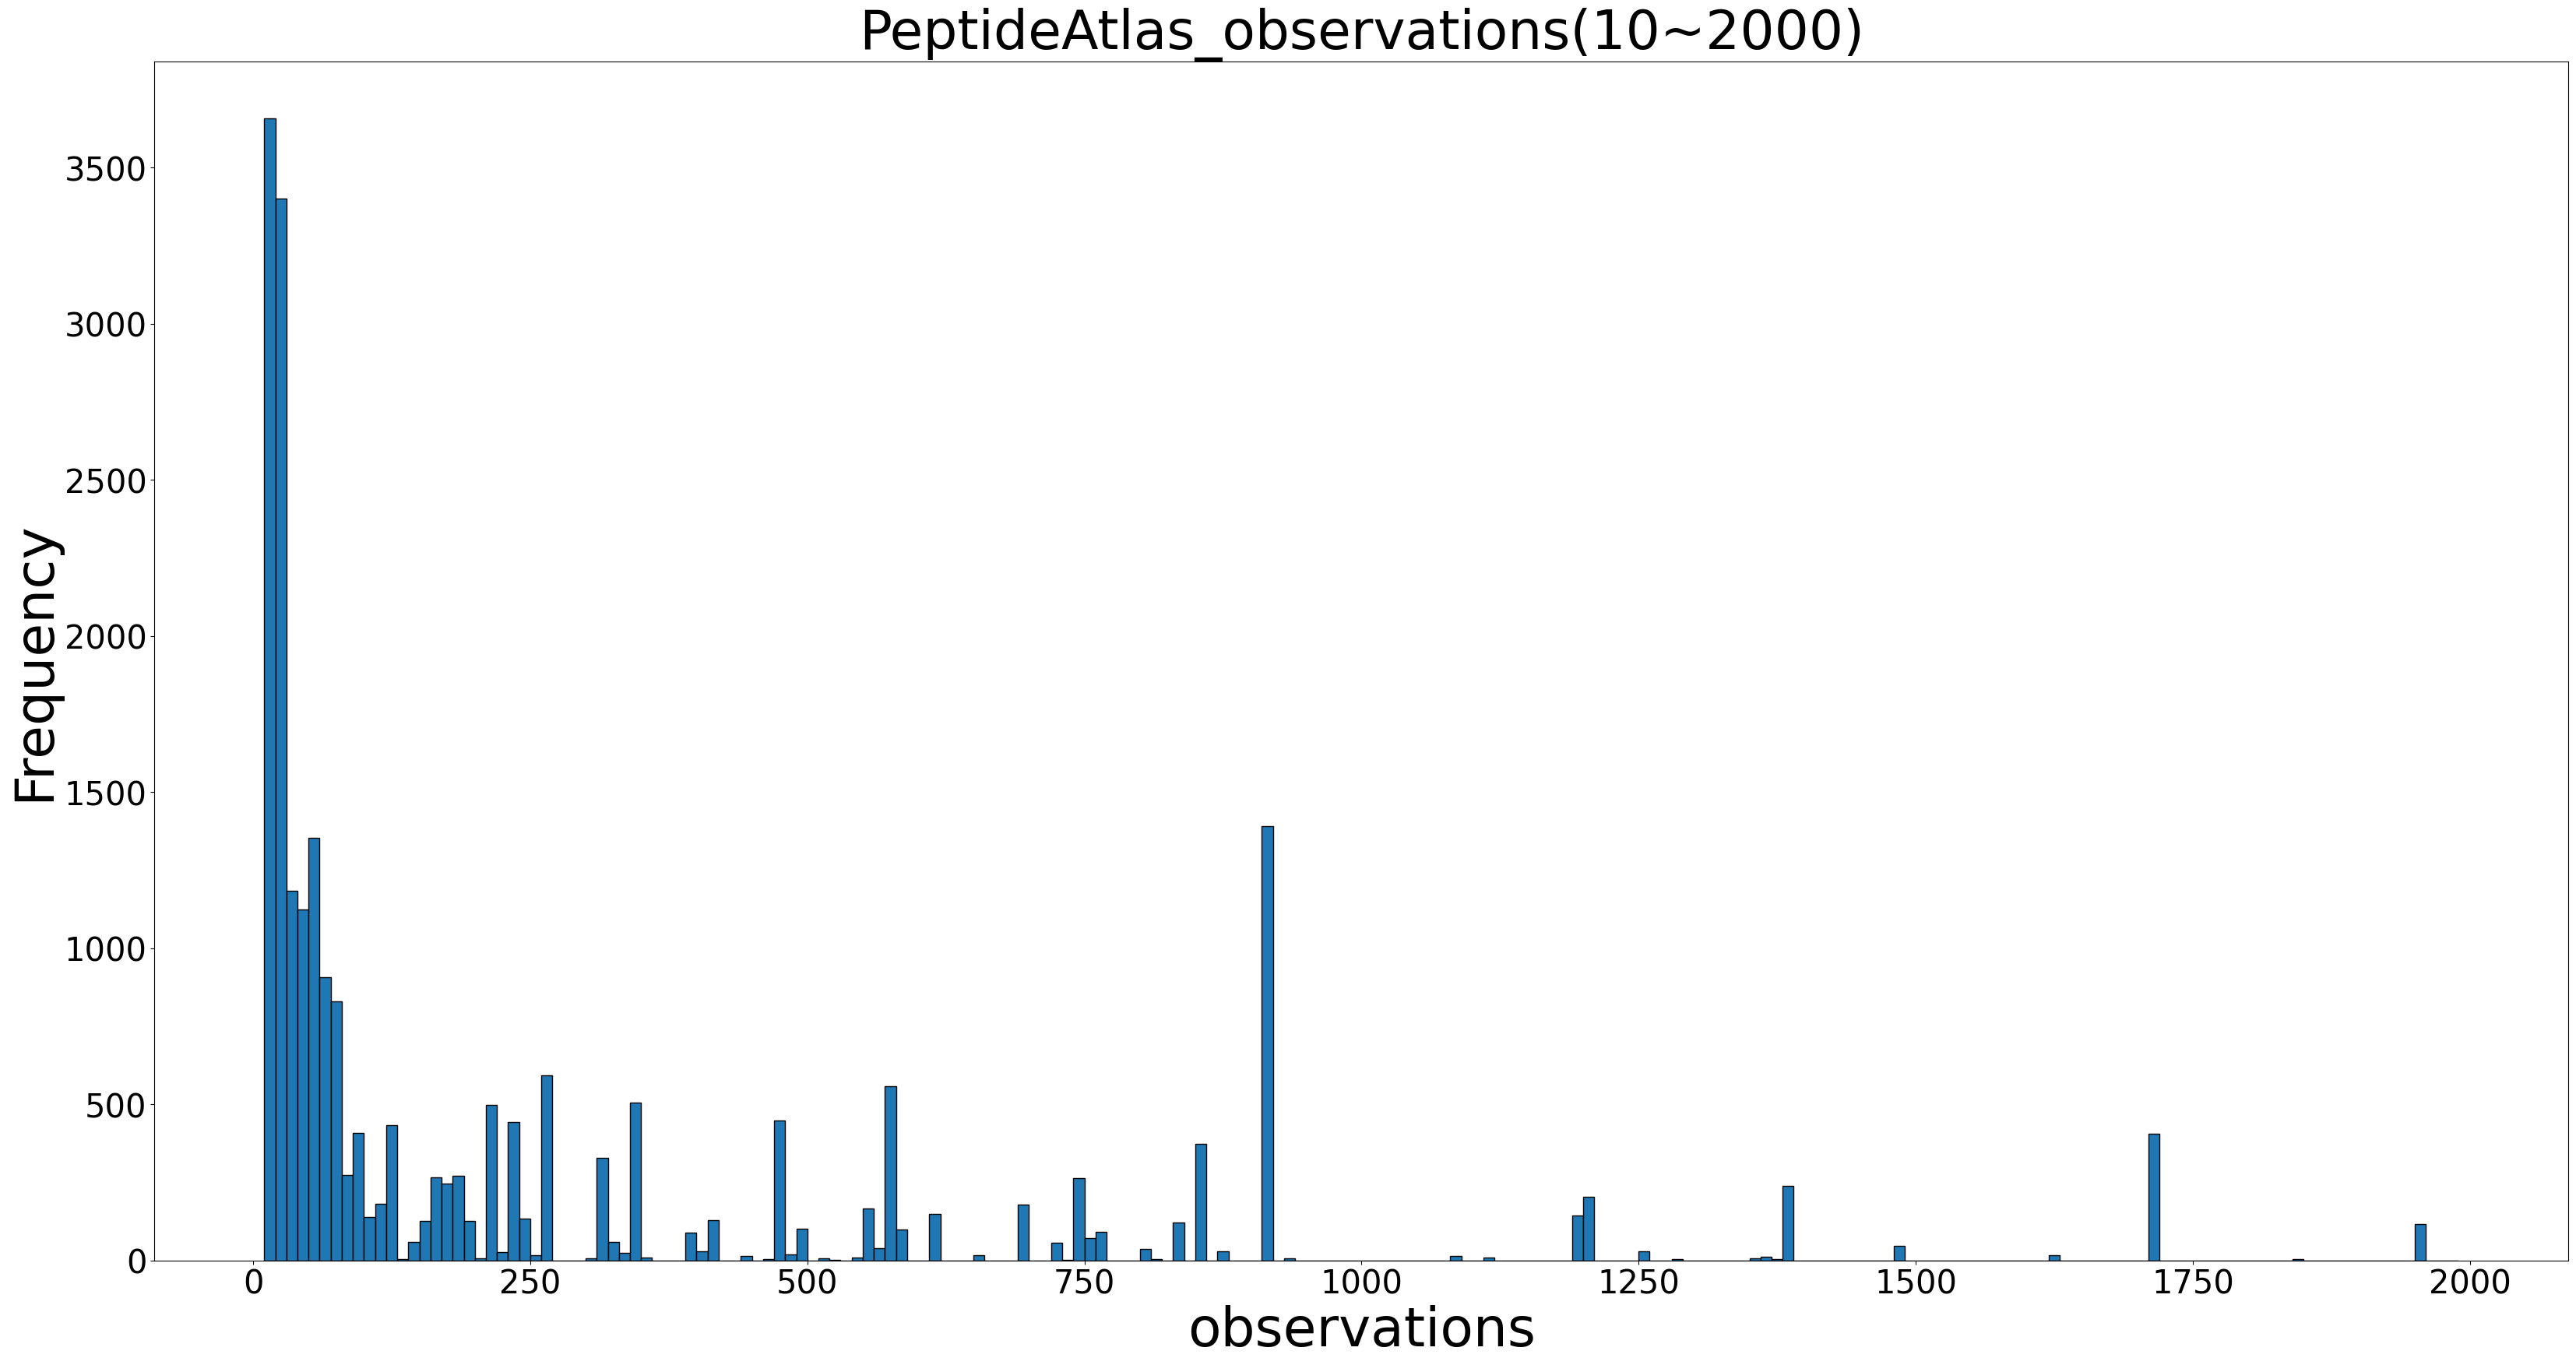

In [51]:
bins = range(10, 2000, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(10~2000)', fontsize=50)
plt.show()

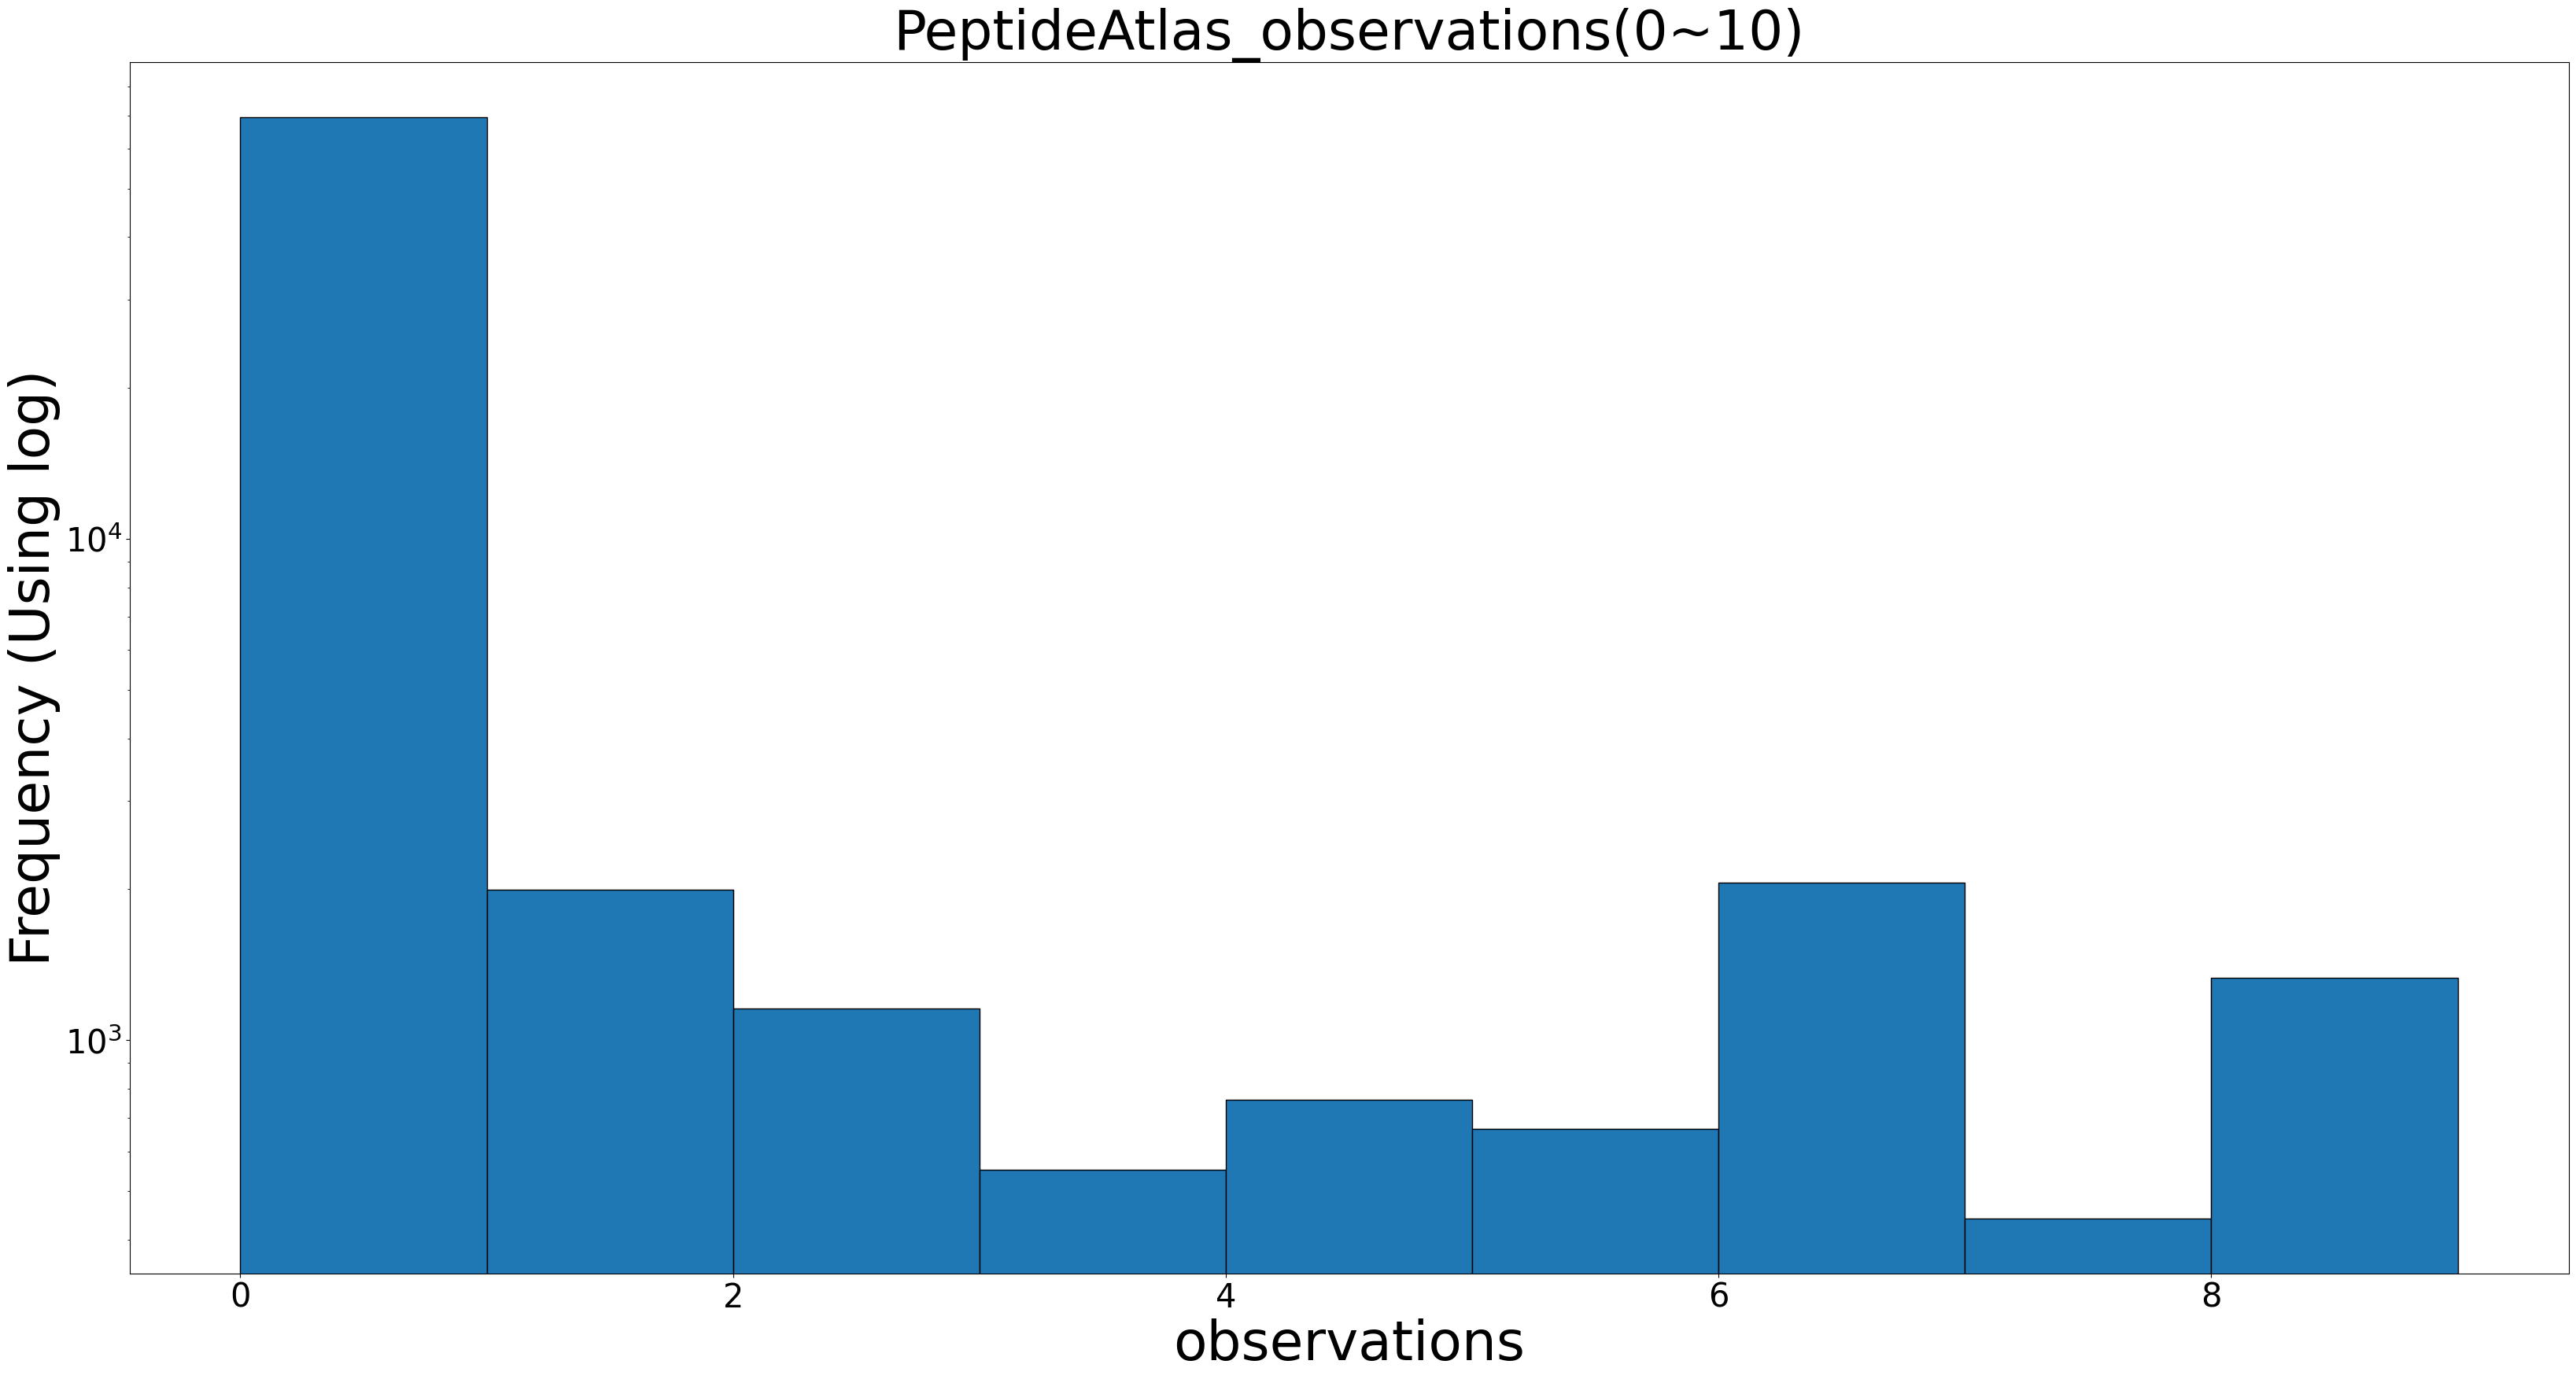

In [55]:
bins = range(0, 10, 1)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(0~10)', fontsize=50)
plt.show()

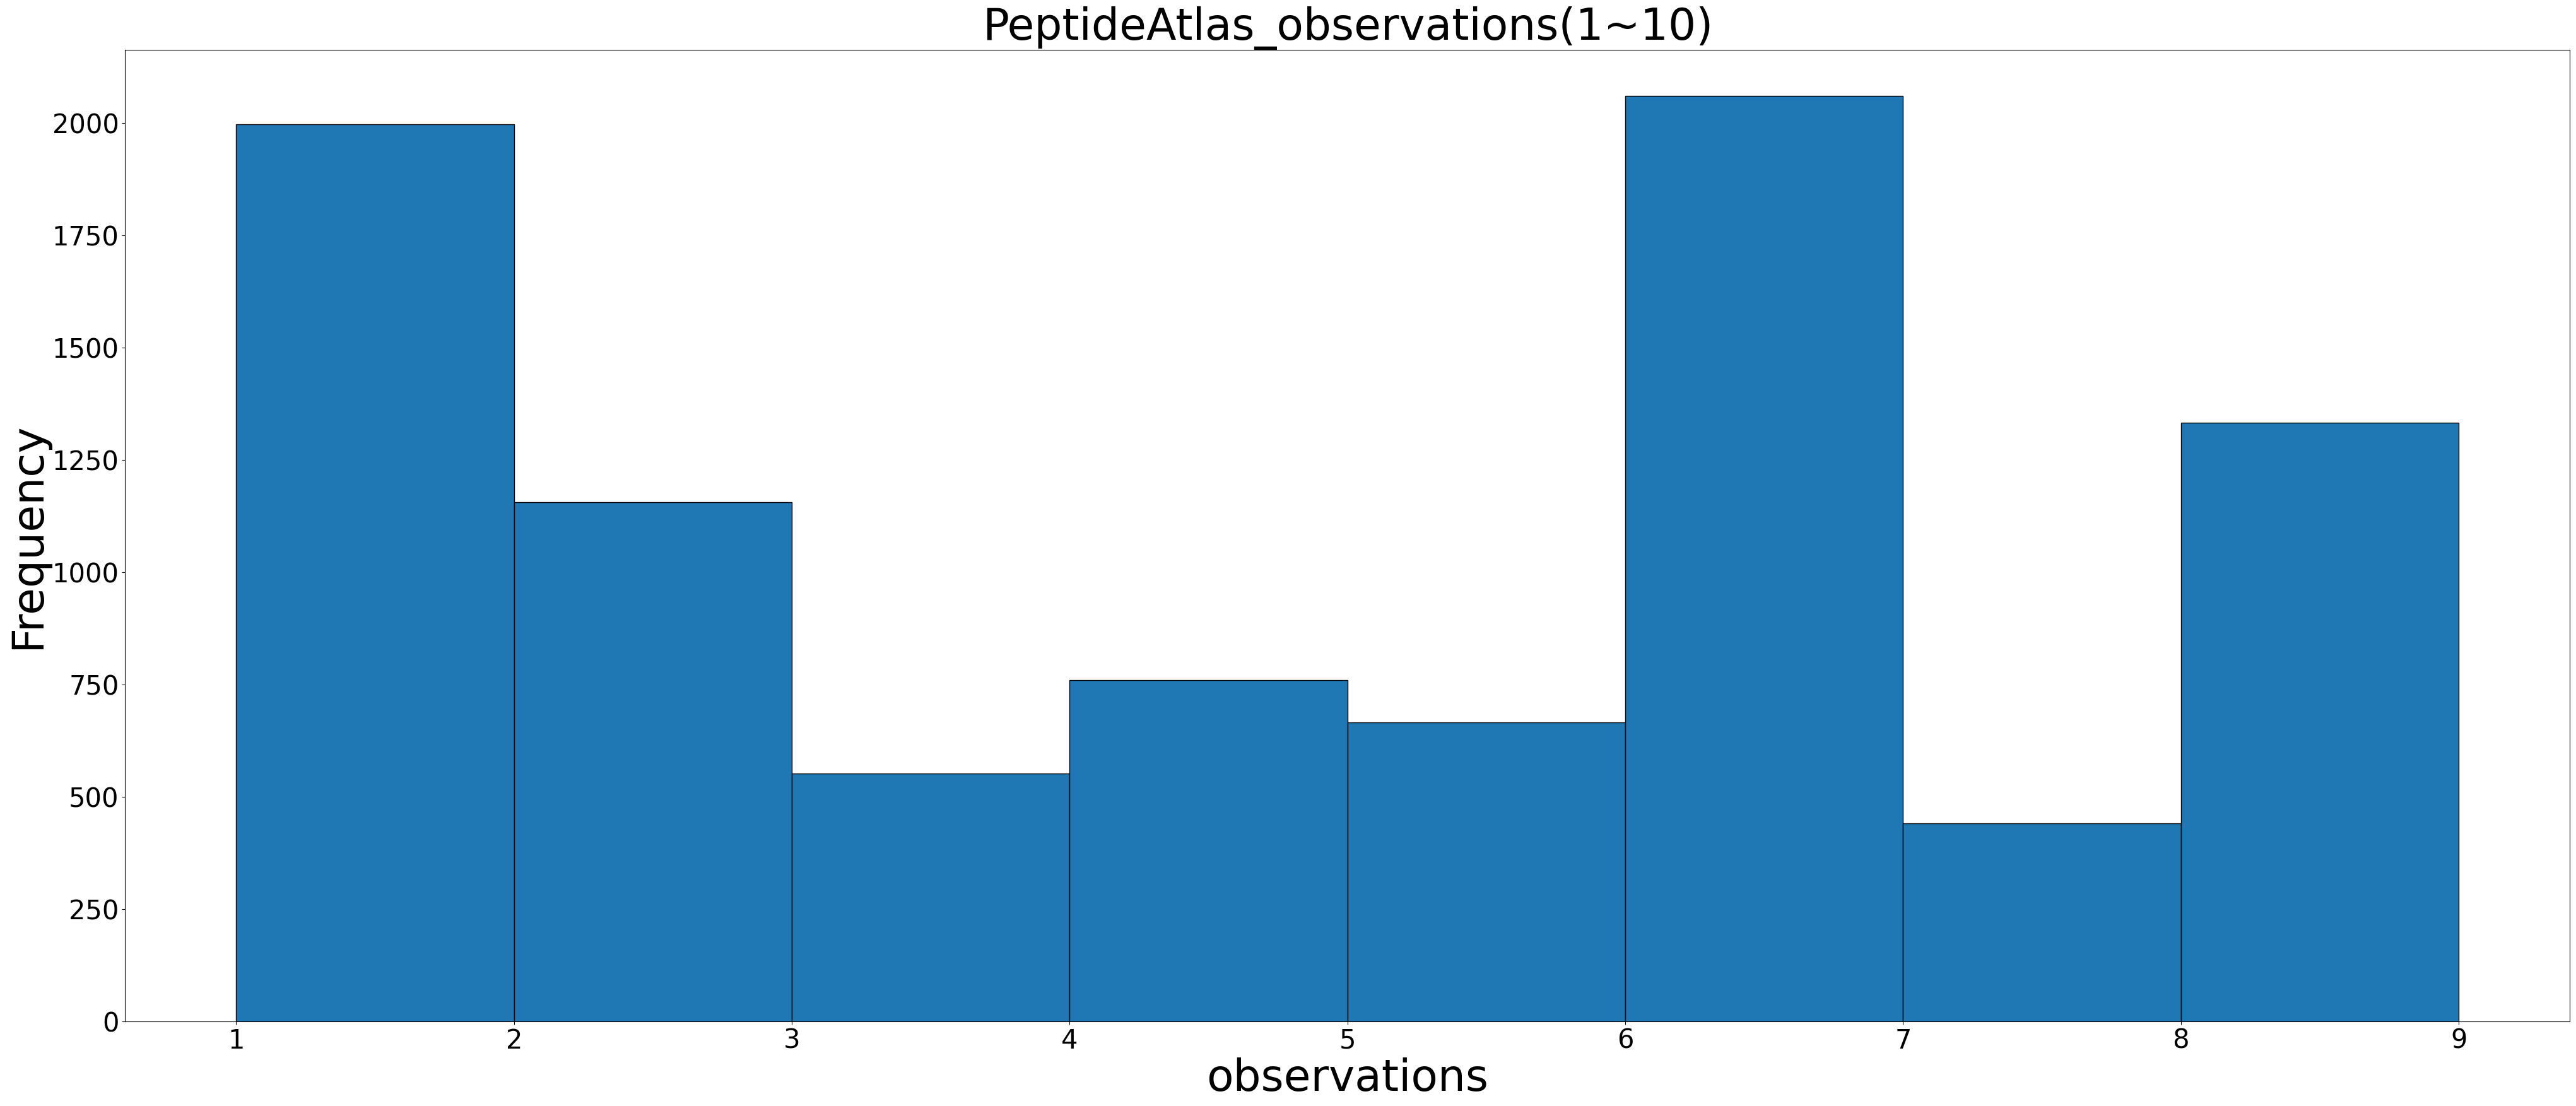

In [56]:
bins = range(1, 10, 1)
plt.figure(figsize=(50, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(1~10)', fontsize=50)
plt.show()

#### GPMDB_observations

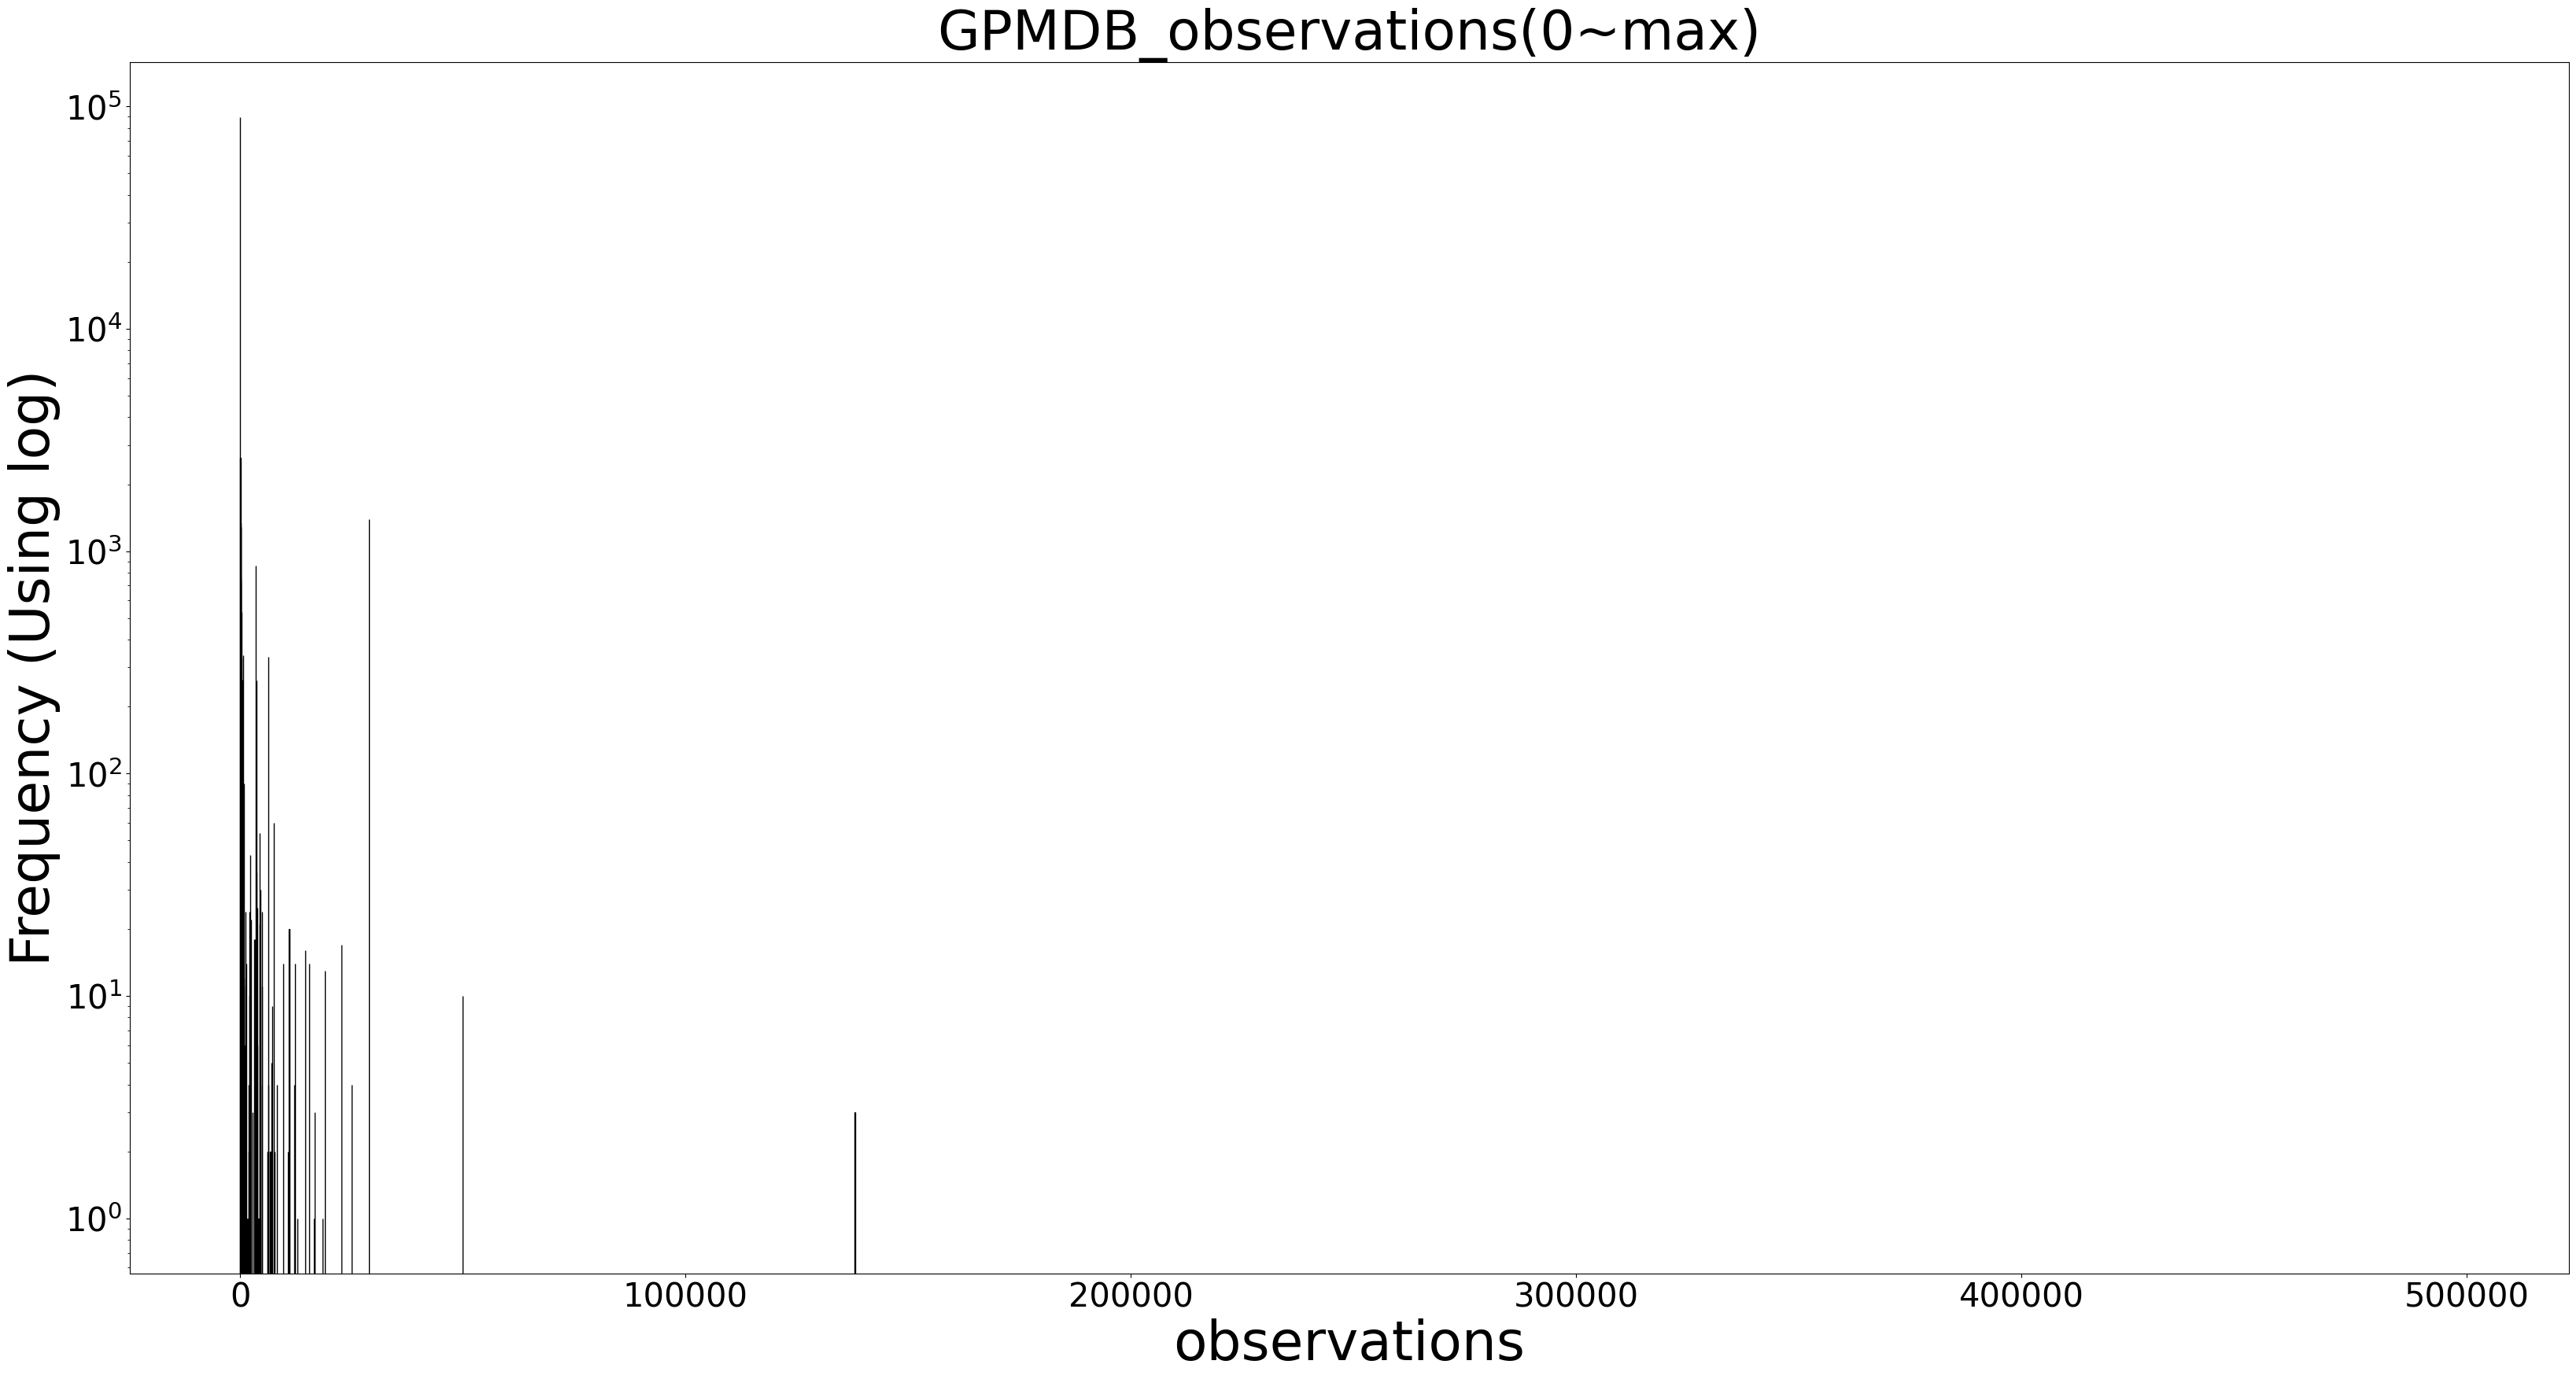

In [57]:
bins = range(0, 498001, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(0~max)', fontsize=50)
plt.show()

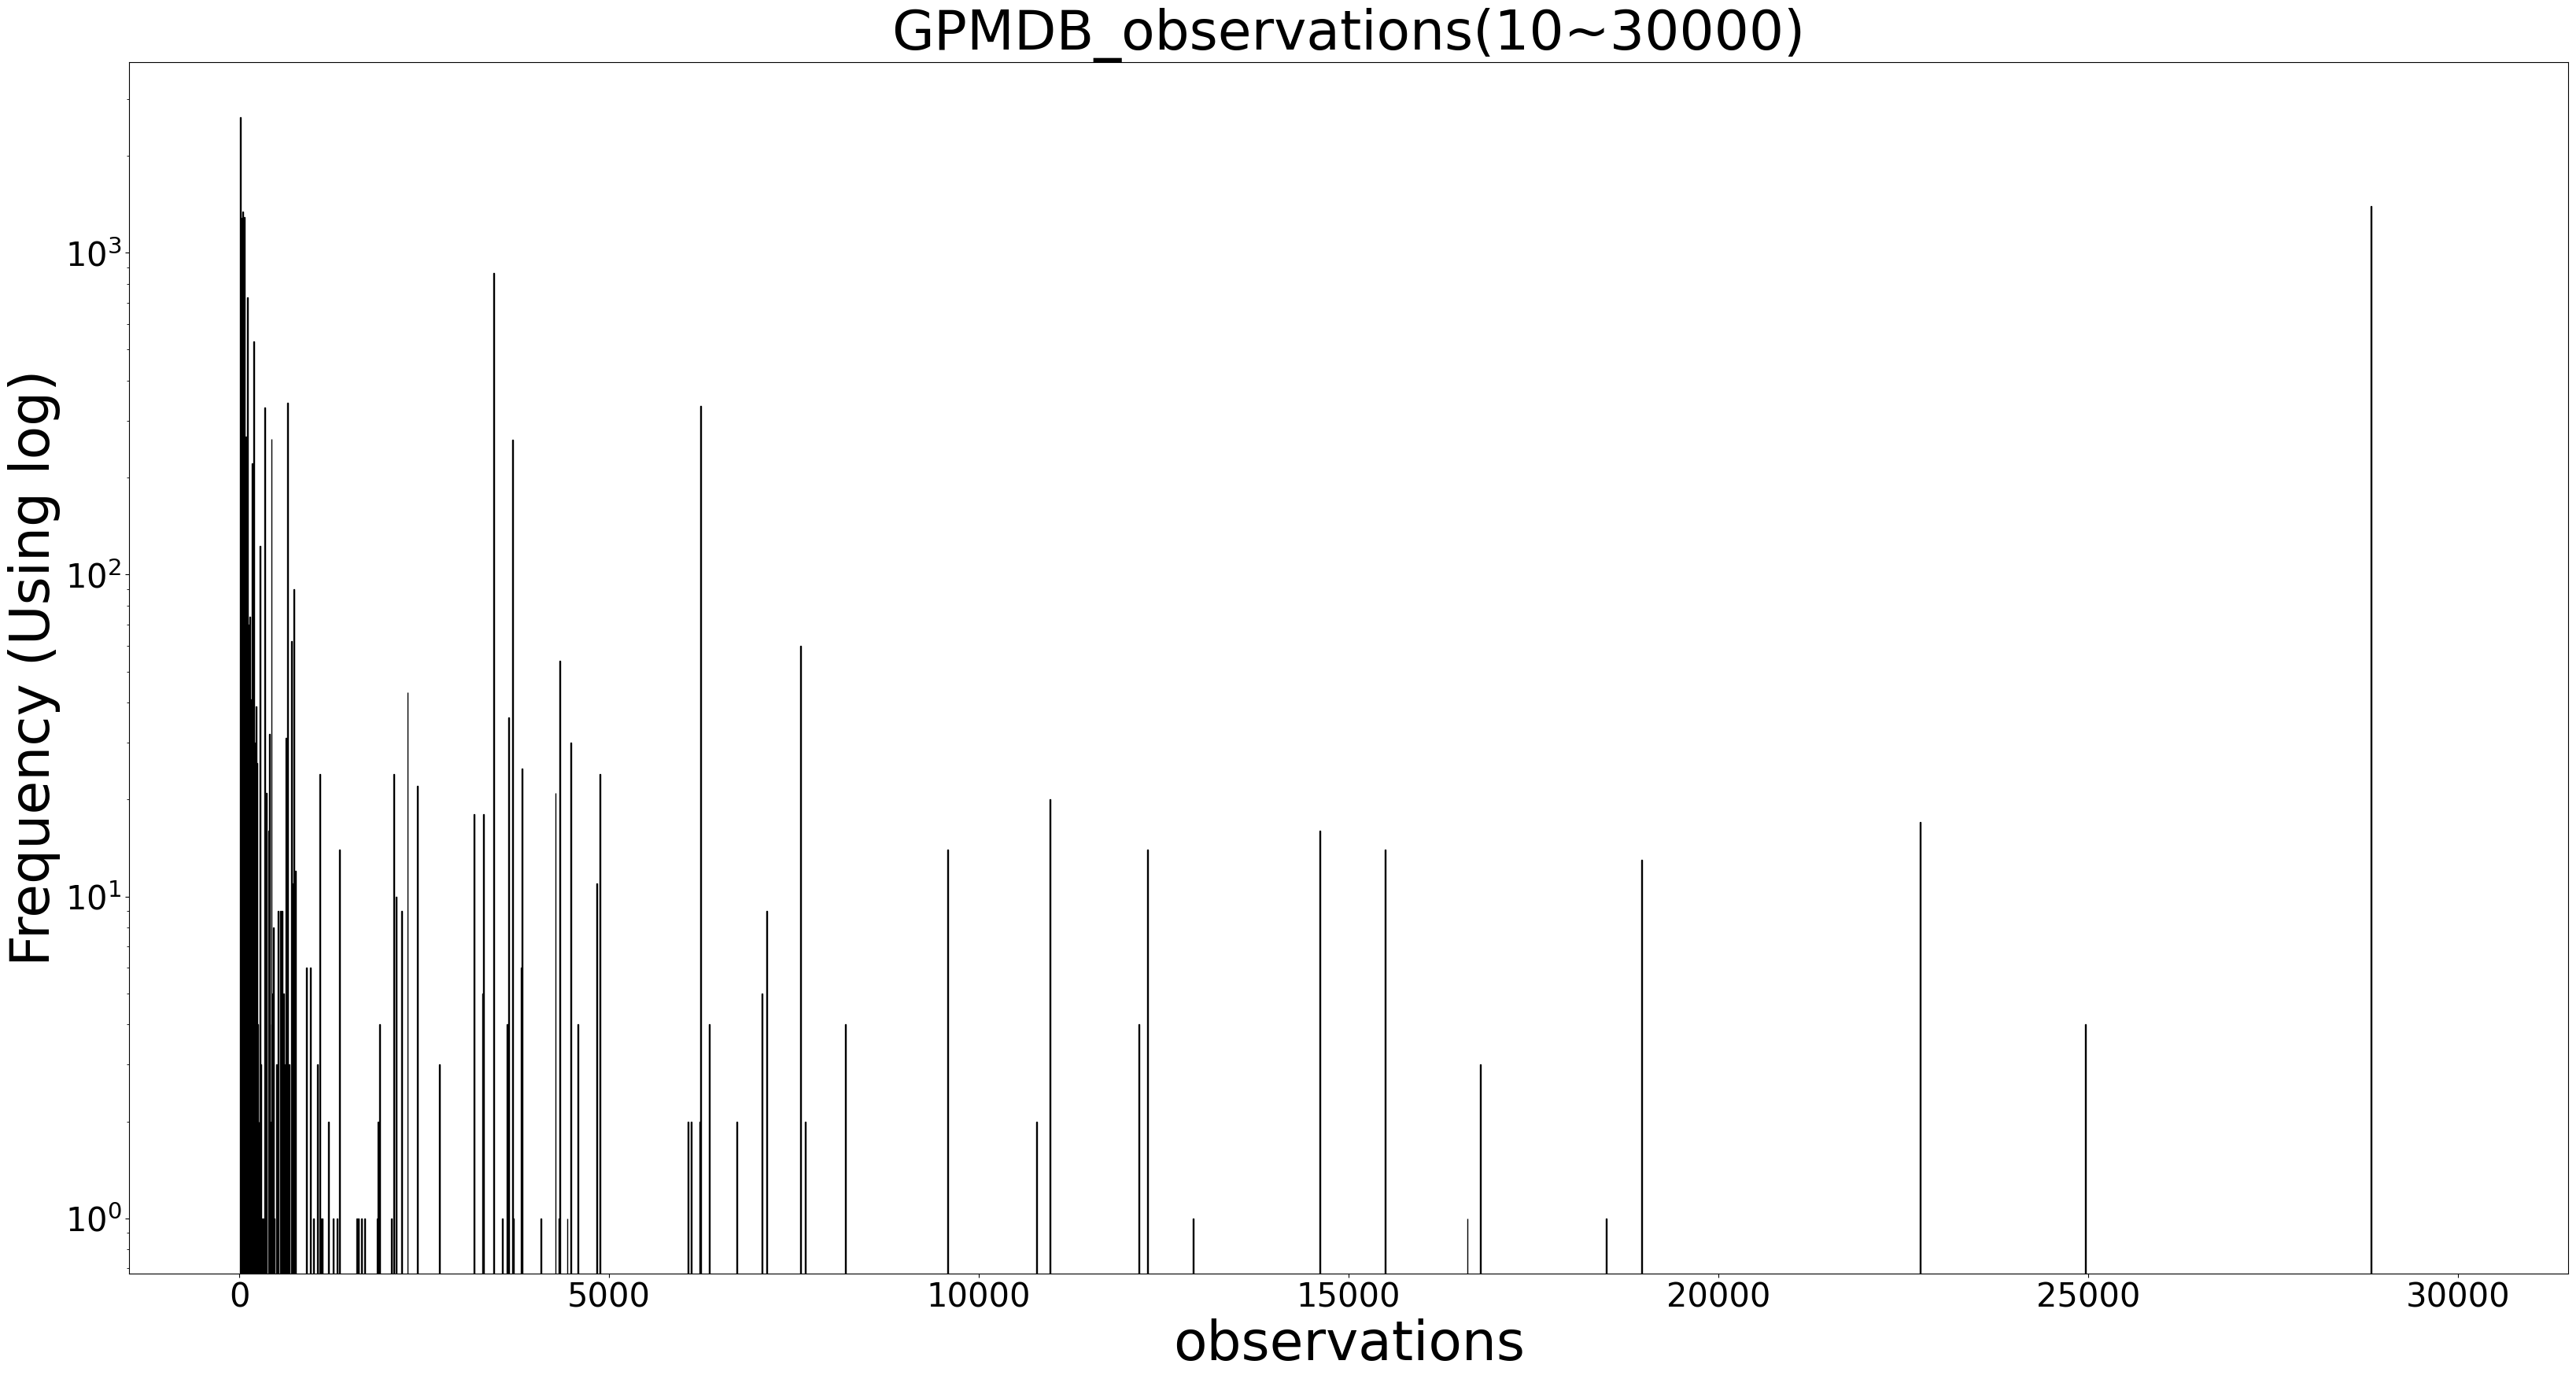

In [66]:
bins = range(10, 30000, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(10~30000)', fontsize=50)
plt.show()

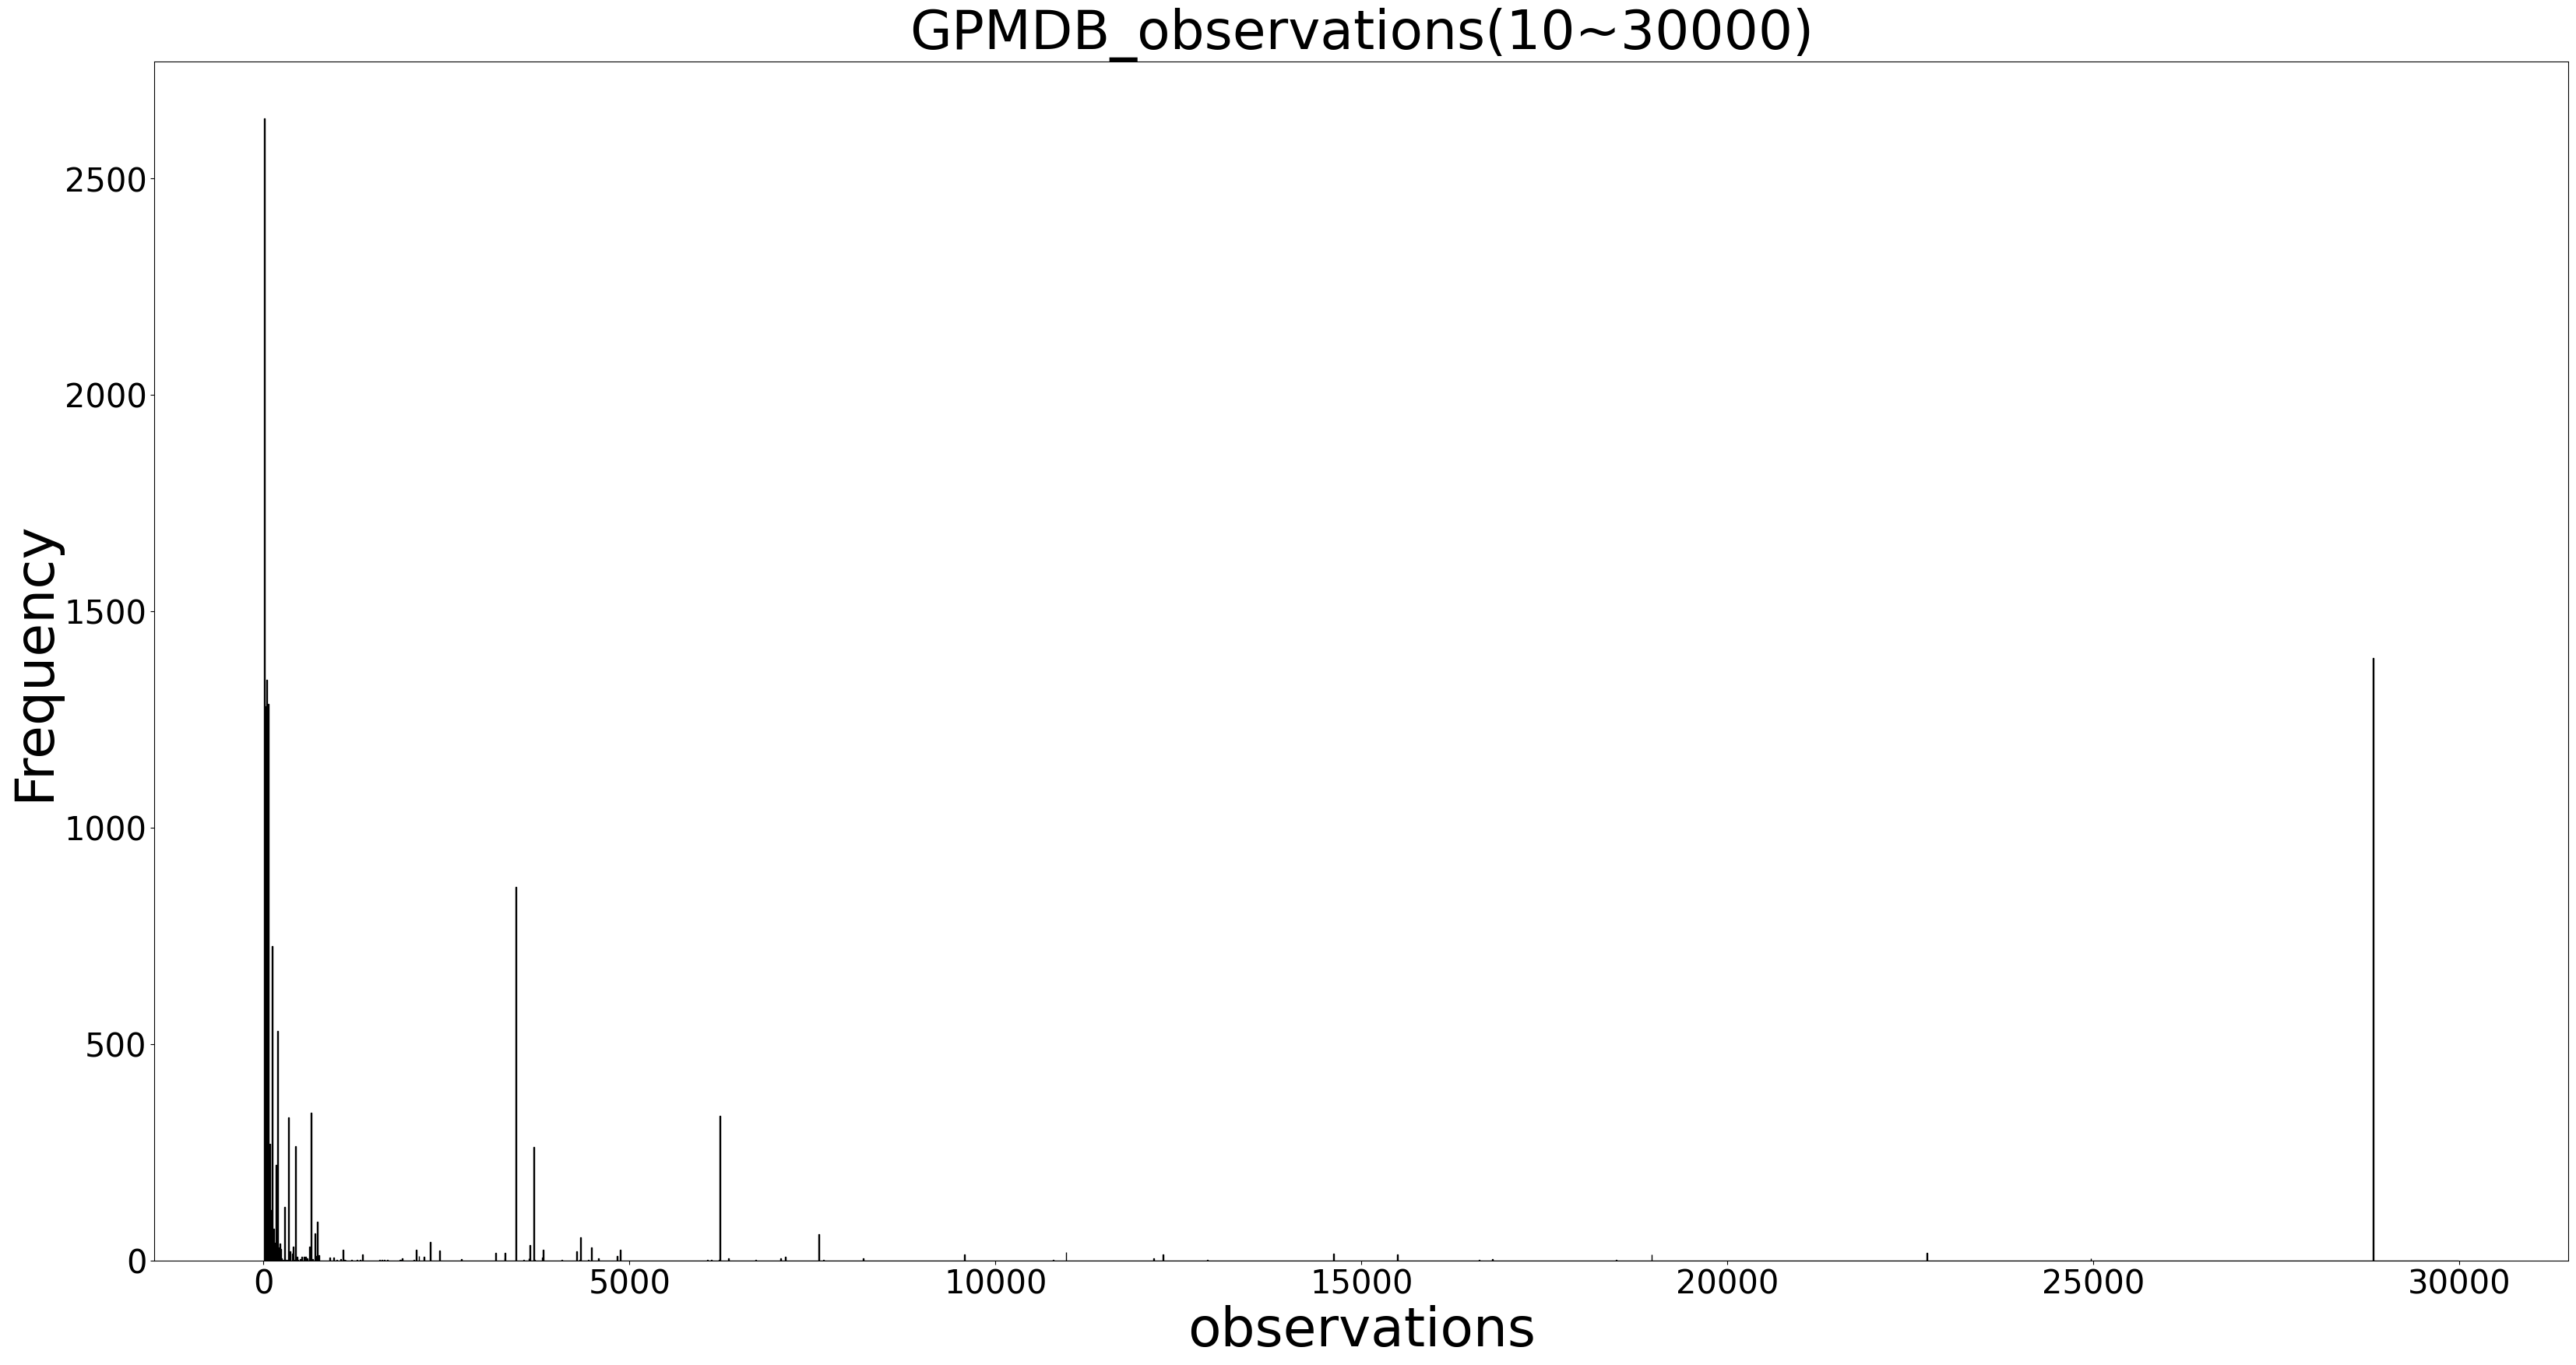

In [67]:
bins = range(10, 30000, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(10~30000)', fontsize=50)
plt.show()

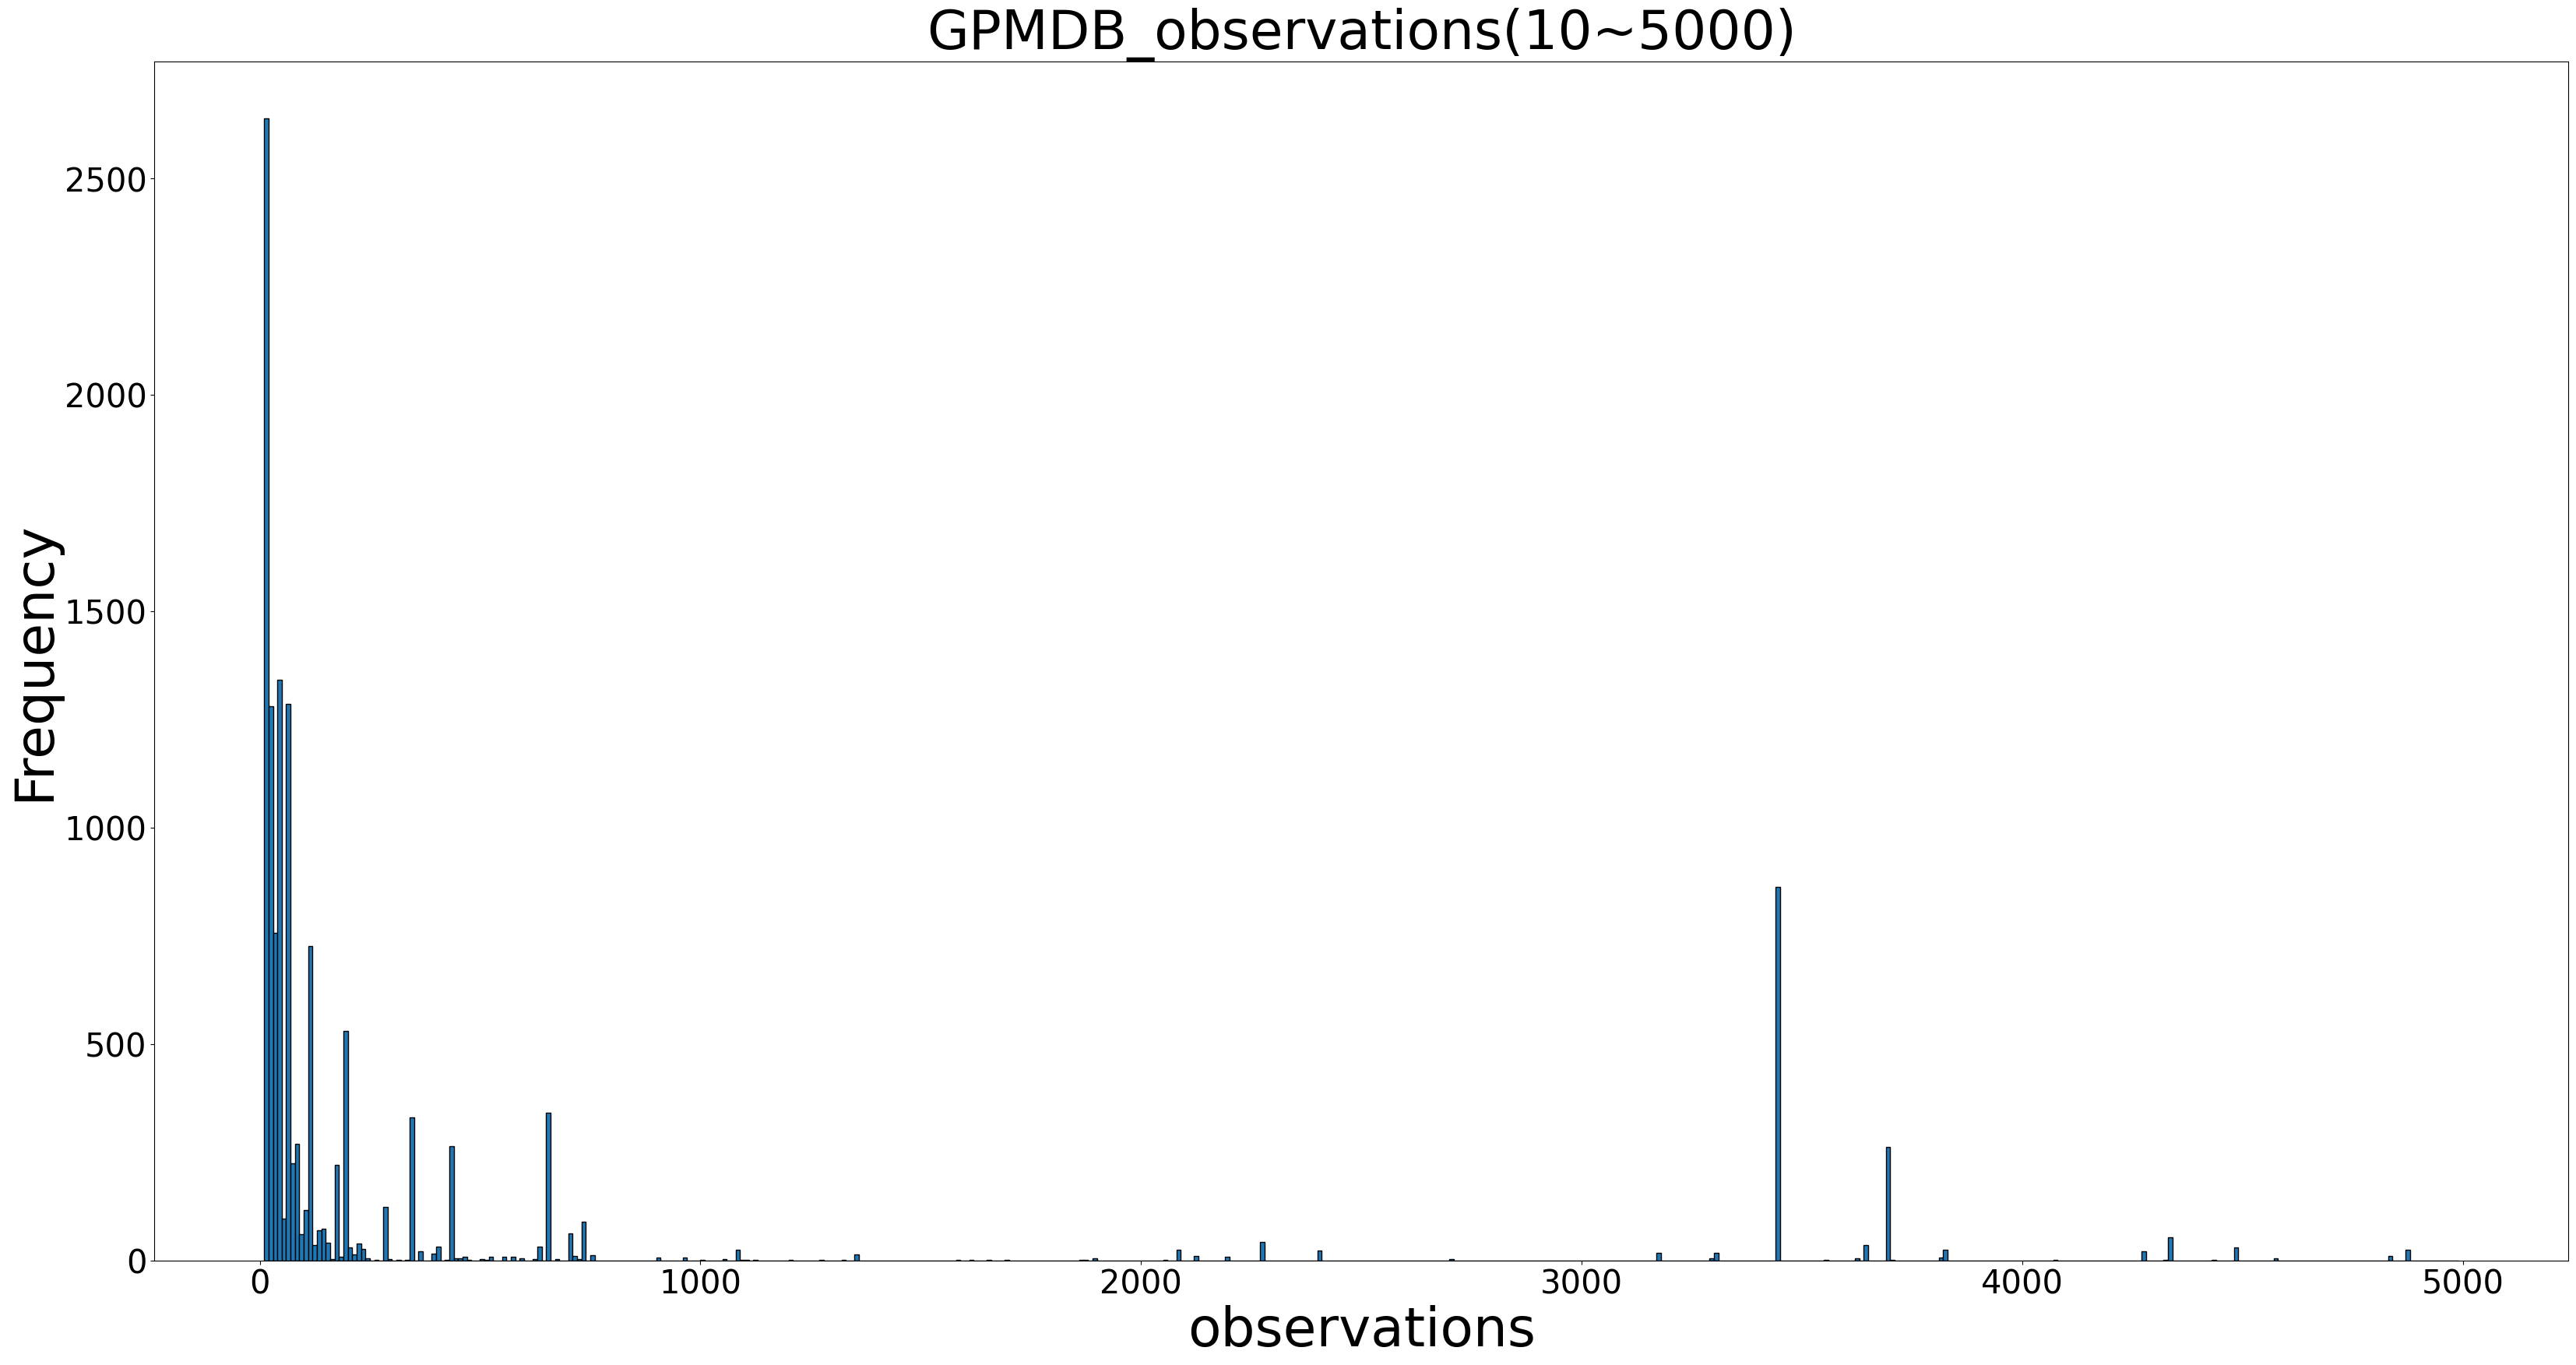

In [63]:
bins = range(10, 5000, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(10~5000)', fontsize=50)
plt.show()

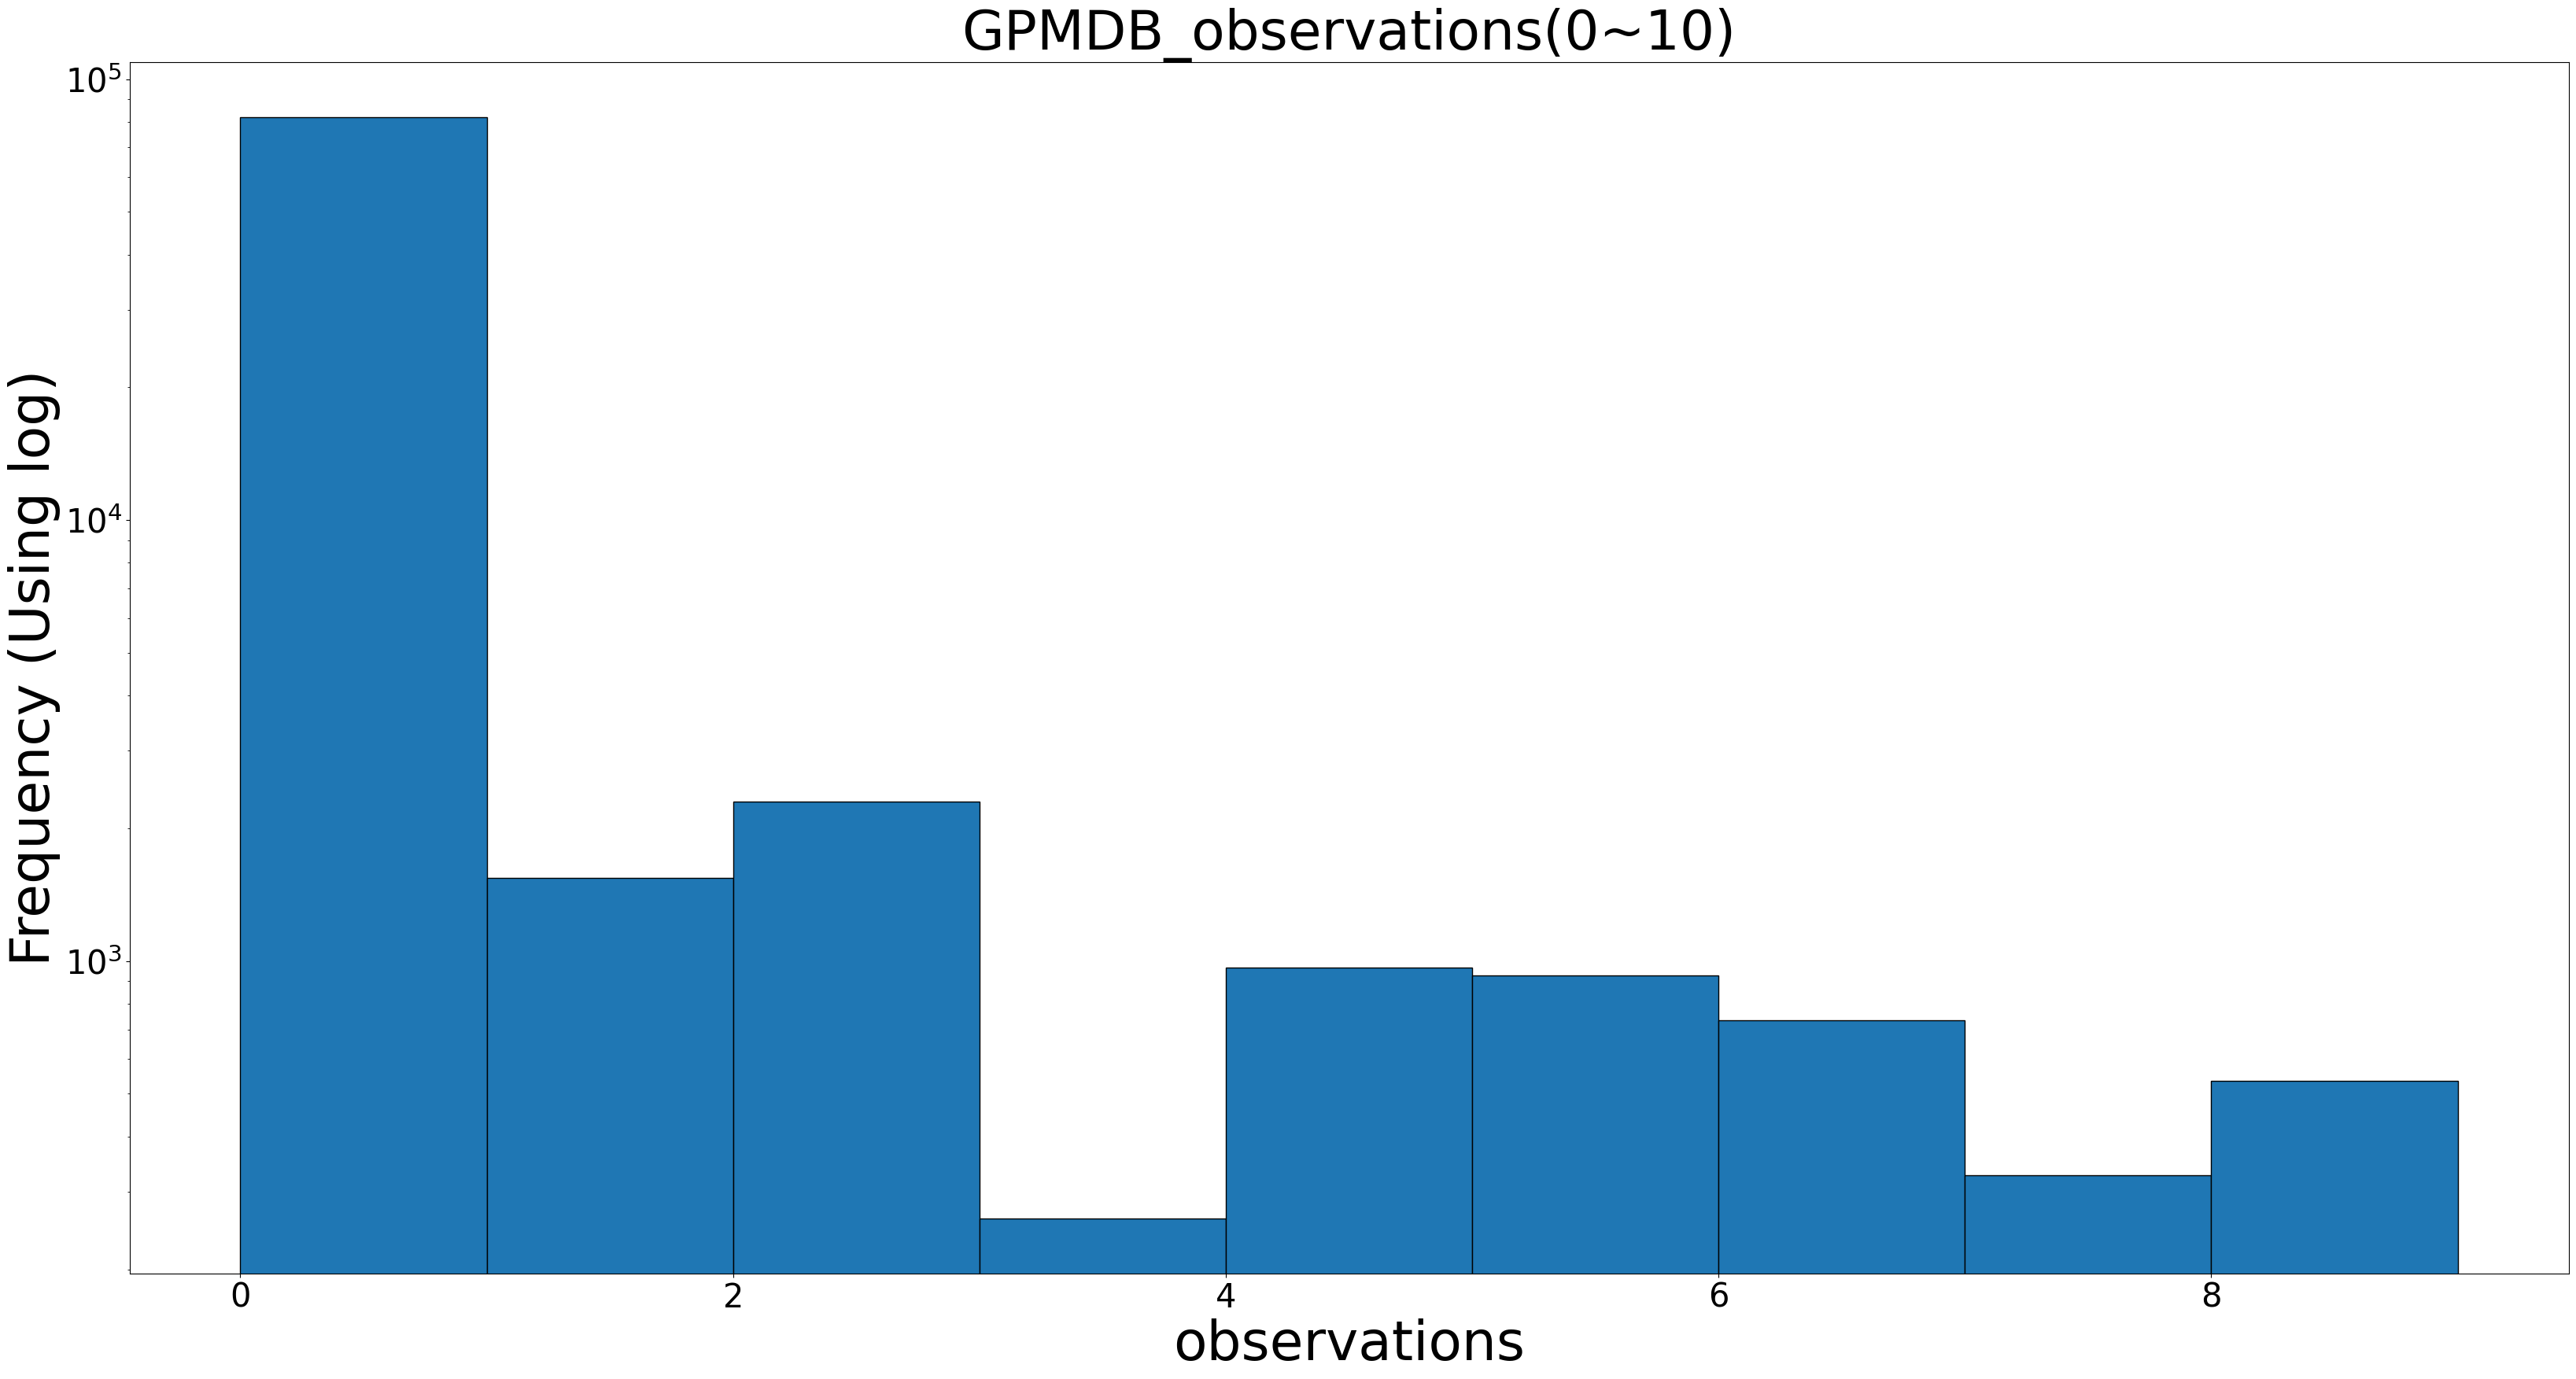

In [64]:
bins = range(0, 10, 1)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(0~10)', fontsize=50)
plt.show()

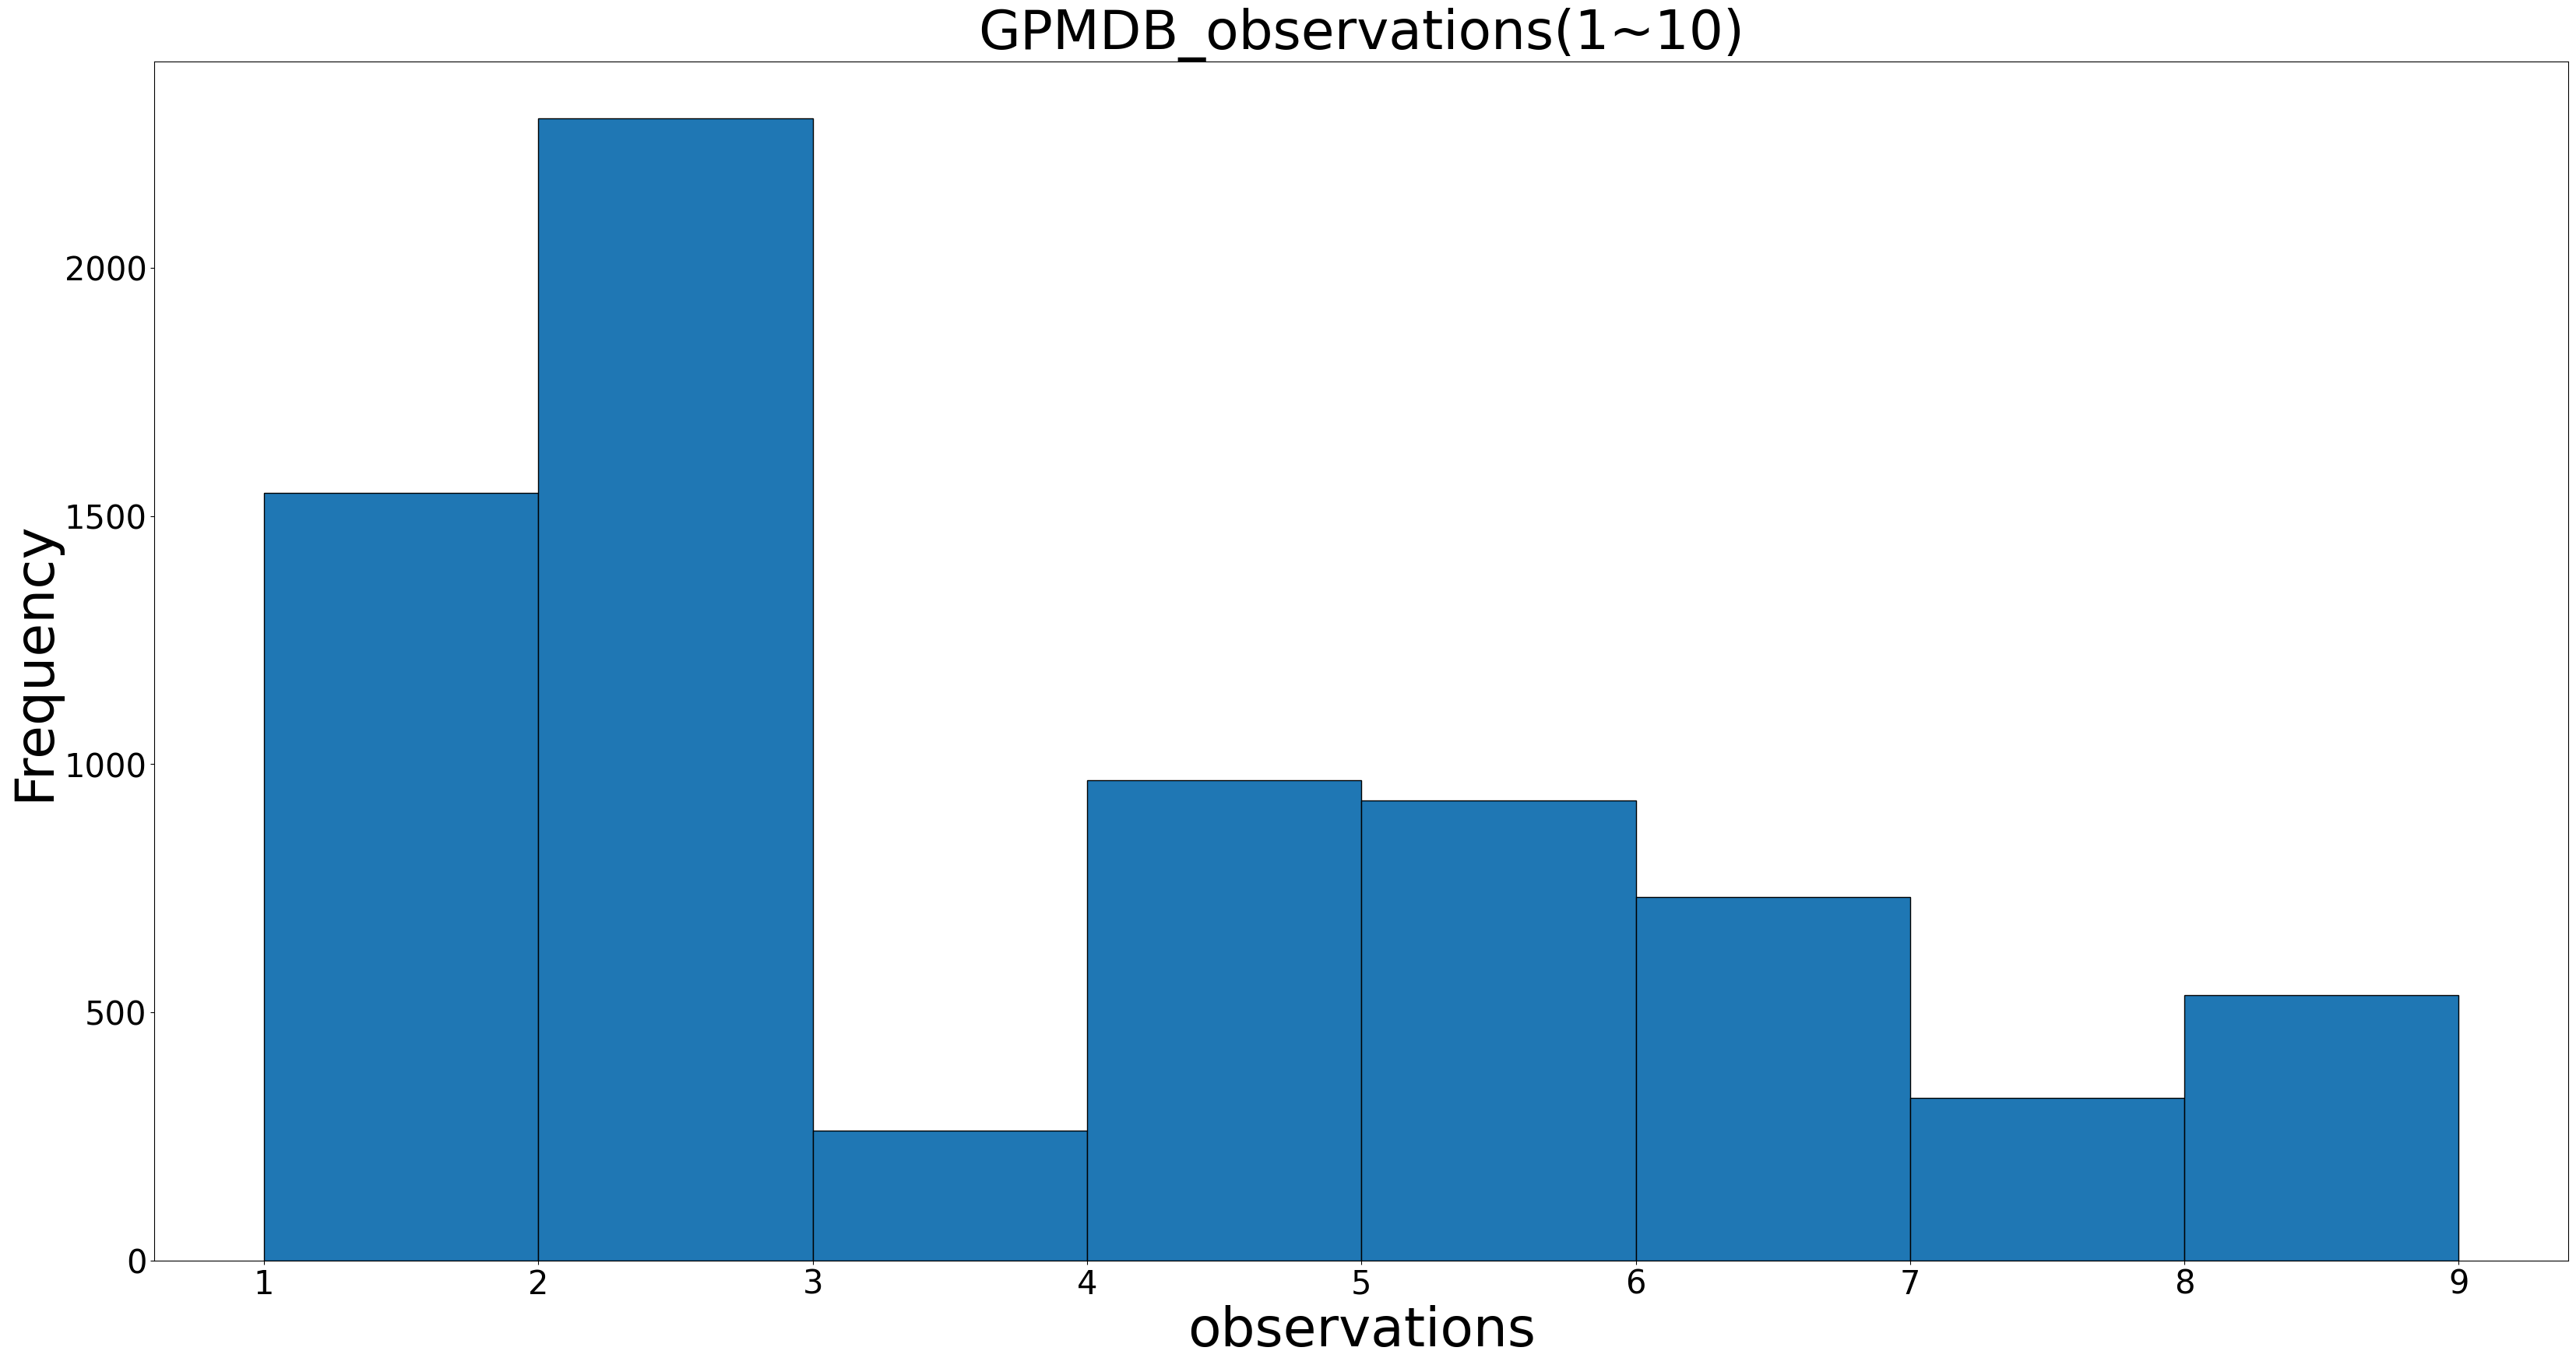

In [65]:
bins = range(1, 10, 1)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(1~10)', fontsize=50)
plt.show()